<center>
  <h1 style="background-color: #80dfffff; color: #137a91ff; padding: 10px">
    <strong>Deliverable 1</strong>
  </h1>
</center>

**Student ID's:**

Andreea Roica: 20250361

Beatriz Varela: 20250367

Barbara Franco: 20250388

Marisa Esteves: 20250348

<h2 style="background-color: #80dfffff; color: #137a91ff; padding: 5px; margin: 5px;">
<strong>Index</strong>
</h2>

[0. **Abstract**](#0th-bullet)

[1. **Business Understanding**](#1st-bullet)<br>

[2. **Data Understanding**](#2nd-bullet)<br>
- [2.1 Metadata, Importing Libraries and Dataset](#3rd-bullet)<br>
- [2.2 Data Exploration](#4th-bullet)<br>  

[3. **Data Preparation**](#5th-bullet)<br>
    

**Group Member Contribution**

Andreea Roica (20250361) :  

Beatriz Varela (20250367) :

Barbara Franco (20250388) :

Marisa Esteves (20250348) :

<h2 id="0th-bullet" style="background-color: #f7d888ff; color: #da6919ff; padding: 5px; margin: 5px;">
  <strong>  0. Abstract </strong>
</h2>

The online car resale company Cars 4 you has been growing and gathering more clients. However, with this growth came increasing waiting lists for the evaluation of the cars. This can become a problem that prevents the company from continuing to grow, as it may lead current clients and potential future customers to turn to competitors instead. They need a way to calculate the price of each car without the mechanics assessment. 

The company has reached out to us so that we can provide a solution to their problem. Our goal is to create regression models that are capable of predicting the price of the car solely based on the information given by the client. Moreover, we have optimize these models and find the model that generalizes better. 

The project is structured in the following way:  

- **EDA (0_EDA)**: Explore, visualize and clean the data set. The hold-out method is applied followed by the correction of typos in the categorical variables and treatment of outliers and missing values. This is done so that we can construct a pre-processing strategy that works for the data available, and so we can interpret the relationships between variables and their distributions better.

- **Regression Benchmarking (1_modelling_fine_tuning)**: Create different regression models and obtain their corresponding performance with Cross-Validation. For each model several hyperparameters will be tested with the use of the function RandomizedSeacrhCV, inside which the Cross-Validation occurs. All the pre-processing steps that require the split of the dataset to avoid data leakage will be implemented in Classes and combined in a single pipeline. Several evaluation metrics will be applied but Mean Absolute Error (MAE) will be the prefered. All models trained will be compared by their metrics, however we will also take into consideration the overfitting of the models when making the final decision:  

**Note:** this notebook will also contain the **Ablation Study** which measures the contribution of each element of the pipeline and **Feature Importance** which analyses the contribution of each feature for the predictions. We considered these extra steps to be relevant since they could find insighful information that could change the way we pre-process the data and select features for the final model.

- **Deployment (2_deployment)**: The best model is fitted to the entire train dataset (and preprocessed using the pipeline), the test set is also pre-proccessed and the price predictions are made. Then, the results are exported to csv file, that is uploaded to kaggle.

We also created an analytical interface that simulates the platform for cars 4 you. It allows the client to insert a csv file containing infromation about the car, or manually type it. Then, it returns the predicted price for the car(s). For that the file predictions_streamlit.py was created. The link is available on github and at the end of deployment.ipynb

The files function.py and Classes.py are necessary for this project as well.

Results: FALTA ESCREVER ISTOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO
Conclusions: OOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO

This project is publicly available on github:  
https://github.com/barbara-sousa-franco/Machine-Learning-Project

<h2 id="1st-bullet" style="background-color: #f7d888ff; color: #da6919ff; padding: 5px; margin: 5px;">
  <strong>  1. Business Understanding</strong>
</h2>


To avoid losing costumers to the competition due to increasing waiting lists for car inspections, Cars 4 You wants us to create predictive model capable of evaluating the price of a car, without needing the mechanics assessment, only the user's input. For that purpose, we have access to a 2020 database, with information about several cars and their respective price. Information in that database that comes from the evaluation made by the mechanic should not be used, since we want to create a model that does not rely on it. Cars 4 you is an online car resale, when building the models, it is preferable to estimate a slightly higher car price than underpricing, since it ensures that neither the company nor the client loses money. 

We have to create several regression models that are able to predict the price of a car and then we have to do model optimization, we explore different hyperparameters for each model, compare the models and choose the one that best fits the data.

Although we use the hold out method in this notebook, so that we can create a preprocessing strategy that fits the data available, for evaluation of the models we will use Cross-Validation so that we get more trustworthy results. We will do this in parallel with fine tuning of the models by using the funtion RandomizedSearchCV




<h2 id="2nd-bullet" style="background-color: #f7d888ff; color: #da6919ff; padding: 5px; margin: 5px;">
  <strong> 2. Data Understanding</strong>
</h2>


<h3 id="3rd-bullet" style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> 2.1 Import the dataset and explore the data</strong>
</h3>



- **carID** : An attribute that contains an identifier for each car.
- **Brand** : The car’s main brand (e.g. Ford, Toyota).
- **model** : The car model.
- **year**: The year of Registration of the Car.
- **transmission** - Type of transmission of the car (e.g. Manual, Automatic, Semi-Automatic)
- **mileage** : The total reported distance travelled by the car (in miles).
- **tax** : The amount of road tax (in £) that, in 2020, was applicable to the car in question.
- **fuelType** : Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric).
- **mpg** : Average Miles per Gallon.
- **engineSize** : Size of Engine in liters (Cubic Decimeters).
- **paintQuality%** : The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation).
- **previousOwners** : Number of previous registered owners of the vehicle.
- **hasDamage** : Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.
- **price** : The car’s price when purchased by Cars 4 You (in £).

- Installing fuzzywuzzy package for typo correction:

In [225]:
!pip install fuzzywuzzy; plotly

### 
- Importing necessary libraries:

In [226]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import openpyxl 
from math import ceil
import plotly.express as px


# Import to divide the train set, encode and scale variables
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import TargetEncoder, StandardScaler, OneHotEncoder

# Import models and metrics used
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, ElasticNet, HuberRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_absolute_percentage_error, median_absolute_error, root_mean_squared_error

# Import fuzzywuzzy to correct the typos in 'Brand', 'fuelType' snd 'transmission'
from fuzzywuzzy import fuzz

# Import get_close_matches to identify and group similar words for typo correction in 'model'
from difflib import get_close_matches, SequenceMatcher

# Import to perform the Chi-squared test
from scipy.stats import chi2_contingency

# Import for wrapper methods
from sklearn.feature_selection import RFE

from functions import *

import warnings
warnings.filterwarnings('ignore')


- Setting a random seed:

In [227]:
np.random.seed(33)

- Reading the data:

In [228]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [229]:
df_train.head()

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0


We can already see that we have Null Values (at least in tax) and have strange values like negative/float previous owners.

In [230]:
df_test.head()

,carID,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,89856,Hyundai,I30,2022.878006,Automatic,30700.000000,petrol,205.0,41.5,1.6,61.0,3.0,0.0
1,106581,VW,Tiguan,2017.000000,Semi-Auto,-48190.655673,Petrol,150.0,38.2,2.0,60.0,2.0,0.0
2,80886,BMW,2 Series,2016.000000,Automatic,36792.000000,Petrol,125.0,51.4,1.5,94.0,2.0,0.0
3,100174,Opel,Grandland X,2019.000000,Manual,5533.000000,Petrol,145.0,44.1,1.2,77.0,1.0,0.0
4,81376,BMW,1 Series,2019.000000,Semi-Auto,9058.000000,Diesel,150.0,51.4,2.0,45.0,4.0,0.0


The test dataset seems to be in the same format as the train dataset.

In [231]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


Identified Problems:

- Year and previousOwners is float when it should be integer
- hasDamage should be boolean instead of float
- All features appart from carID e price have missing values (carID will be used as index as it is a unique identifier of the car and all observations need to have a value for the target ('price') in order to contribute for machine learning models.)

In [232]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


We can see that the data types are the same as the train set and all features apart from carID have missing values. As expected, the feature 'price' is missing.


The goal of the project is to be able to predict the price of a bar based simply on the input of the users, without needing the car to be taken to the mechanic. Since the featue 'paintQuality%' is obtained by the assessment of the mechanic, it is not logical to have that information on the base of the predictive models. 'paintQuality%' is present in both datasets. We will remove the entire column right now (analysing the feature will not contribute to our work).

In [233]:
df_train.drop(columns='paintQuality%', inplace = True) 
df_test.drop(columns = 'paintQuality%', inplace = True)


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Duplicates </strong>
</h3>


In [234]:
print('Check duplicates:')
print(f"Train: {df_train.duplicated().sum()}\nTest: {df_test.duplicated().sum()}")
print('\nCheck duplicates in carId:')
print(f"Train: {df_train.duplicated(subset='carID').sum()}\nTest: {df_test.duplicated(subset='carID').sum()}\n\n")

Check duplicates:
Train: 0
Test: 0

Check duplicates in carId:
Train: 0
Test: 0




Both datasets have no global duplicates nor duplicates in the carID. No need to include duplicates' treatment in the preprocessing.


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Missing Values </strong>
</h3>


In [235]:
round(df_train.isna().sum() / df_train.shape[0],3)

carID             0.000
Brand             0.020
model             0.020
year              0.020
price             0.000
transmission      0.020
mileage           0.019
fuelType          0.020
tax               0.104
mpg               0.104
engineSize        0.020
previousOwners    0.020
hasDamage         0.020
dtype: float64

In [236]:
round(df_test.isna().sum() / df_test.shape[0],3)

carID             0.000
Brand             0.020
model             0.020
year              0.020
transmission      0.019
mileage           0.021
fuelType          0.020
tax               0.102
mpg               0.101
engineSize        0.019
previousOwners    0.018
hasDamage         0.018
dtype: float64

All the variables, except the target ('price'), show a large amount of missing values (~2% of missing values in each one). The features 'tax' and 'mpg' stand out by having an even larger percentage of missing values (more than 10%). This information applies to both datasets.


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Categorical Variables </strong>
</h3>


In [237]:
categorical_features = ['Brand', 'model', 'transmission', 'fuelType']

In [238]:
df_train.describe(include='object')

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


The number of unique values for the categorical features seems very high. We will proceed to investigate their unique values.

- Checking unique values:

In [239]:
for feat in categorical_features:
    print(f"{feat} :" )
    print(f"{pd.concat([df_train[feat], df_test[feat]]).unique().tolist()}\n")

Brand :
['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes', 'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan, 'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel', 'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD', 'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA', 'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod', 'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI', 'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede', 'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod', 'toyot', 'M', 'YUNDAI', 'oyot', 'bm']

model :
[' Golf', ' Yaris', ' Q2', ' FIESTA', ' 2 Series', '3 Series', ' A3', ' Octavia', ' Passat', ' Focus', ' Insignia', ' A Clas', ' Q3', ' Fabia', ' A Class', ' Ka+', ' 3 Series', ' GLC Class', ' I30', ' C Class', ' Polo', ' E Class', ' C Clas', ' Q5', ' Up', ' Fiesta', ' C-HR', ' Mokka X', ' Corsa', ' Astra', ' TT', ' 5 Series', ' Aygo', ' 4 Series', ' SLK'

Every categorical features presents a large number of unique values which refer to the same class but are wrongly typed (e.g. 'petro' and 'PETROL' in fuelType).

### **Bar Plots**

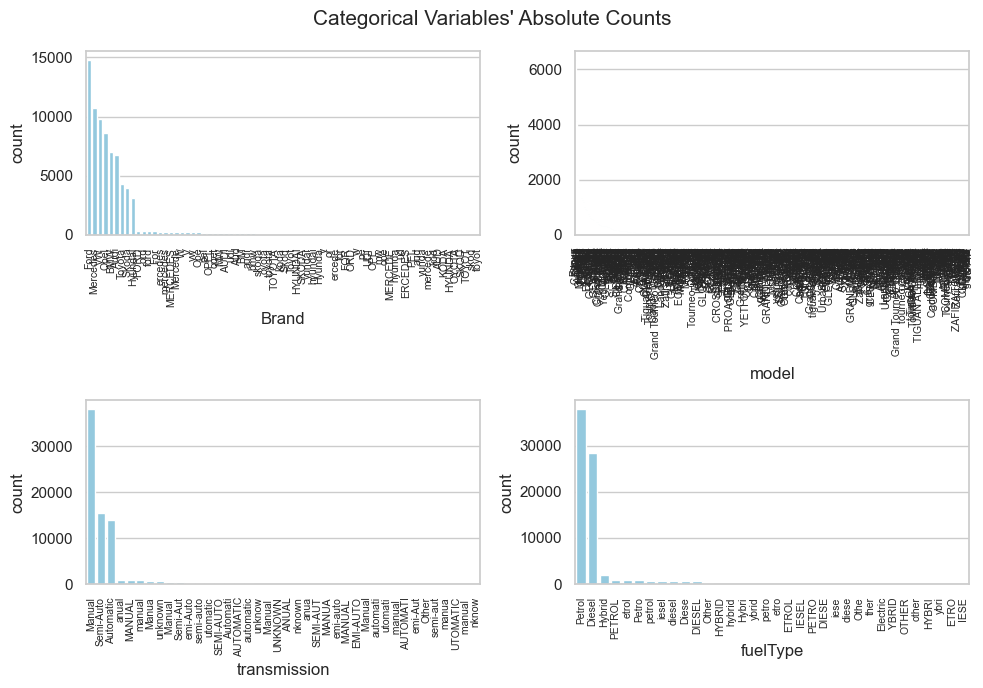

In [240]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(
    2, 
    ceil(len(categorical_features) / 2), 
    figsize=(10, 7)
    )

for ax, feat in zip(axes.flatten(), categorical_features):
    sns.countplot(x=df_train[feat], ax=ax, 
                  order=df_train[feat].value_counts().index, color = 'skyblue') 
    ax.tick_params(axis='x', rotation=90, labelsize='7.5')  


plt.suptitle("Categorical Variables' Absolute Counts", fontsize=15)

plt.tight_layout()
plt.show()

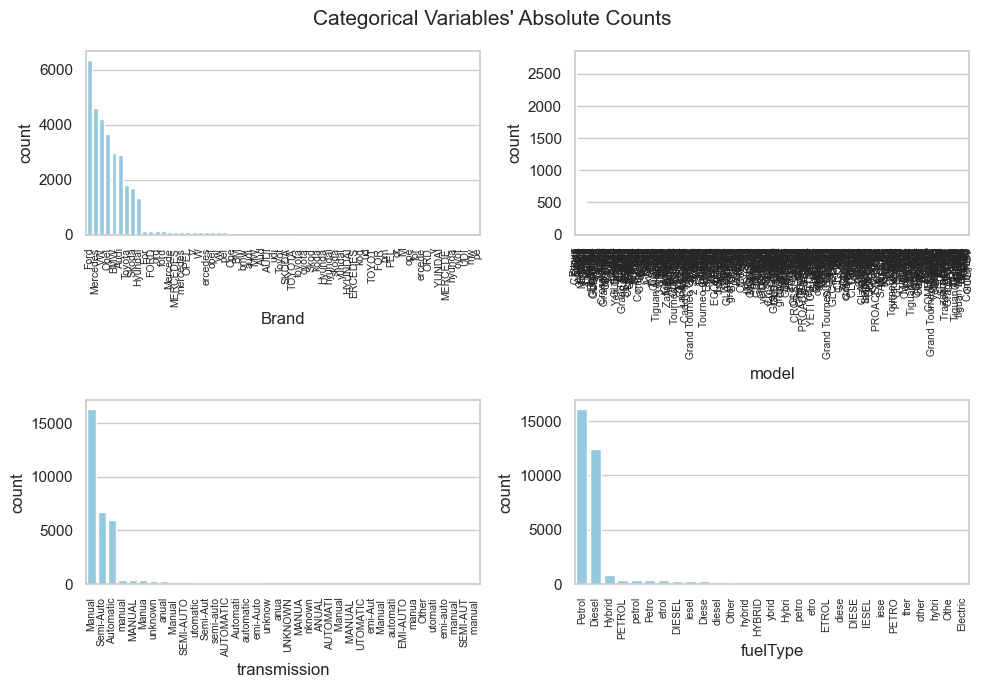

In [241]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(
    2, 
    ceil(len(categorical_features) / 2), 
    figsize=(10, 7)
    )

for ax, feat in zip(axes.flatten(), categorical_features):
    sns.countplot(x=df_test[feat], ax=ax, 
                  order=df_test[feat].value_counts().index, color = 'skyblue') 
    ax.tick_params(axis='x', rotation=90, labelsize='7.5')  


plt.suptitle("Categorical Variables' Absolute Counts", fontsize=15)

plt.tight_layout()
plt.show()

With these plots we can further visualize the problems in the categorical variables: a large amount of classes, most with very low frequency and similar names, in both datasets. We will fix this in Data Preparation.

### **Association between variables**

To evaluate the association between categorical (nominal) variables we will perfom the chi-squared test. 

H0: There is no evidence of a statistically significant association.

H1: There is a statistically significant association between the variables.

Interpretation:
- if p_value < 0.05 (significance level): Reject H0, so there is a statistically significant association between the {var1} and {var2}.
- if p_value >= 0.05 (significance level): Do not reject H0, so there is no evidence of a statistically significant association.

In [242]:
association_results = pd.DataFrame(columns=categorical_features, index=categorical_features) # empty dataframe to store p-values


for var1 in categorical_features:
    for var2 in categorical_features:
        #Chi-square test between {var1} and {var2}

        contingency_table = pd.crosstab(df_train[var1], df_train[var2]) # Create the contingency table
        result = chi2_contingency(contingency_table) # Perform the Chi-square test
                                                    #Chi-square Statistic: result[0]
                                                    #p-value: result[1]
                                                    #Degrees of Freedom: result[2]
                                                    #Expected Frequencies: result[3]
        association_results.loc[var1, var2] = result[1]

association_results= association_results.style.map(color_pvalues)
display(association_results)

,Brand,model,transmission,fuelType
Brand,0.000000,0.000000,0.000000,0.000000
model,0.000000,0.000000,0.000000,0.000000
transmission,0.000000,0.000000,0.000000,0.000000
fuelType,0.000000,0.000000,0.000000,0.000000


With these low values we reject the null hypothesises. There is statistical evidence that there is an association between the categorcial variables.

To measure their association we will use Cramer's V (suitable for nominal variables).

**Cramer's V = √(X2/N) / min(C-1, R-1)**

X2- Chi- squared statistics;

N- Total number of observations;

C- Number of columns in the contingency table;

R- Number of rows in the contingency table.

In [243]:
cramer_v_table = pd.DataFrame(columns=categorical_features, index = categorical_features)

for var1 in cramer_v_table.columns:
    for var2 in cramer_v_table.index:

        contingency_table = pd.crosstab(df_train[var1], df_train[var2])
        result = chi2_contingency(contingency_table)        

        # Calculate Cramer's V
        X2 = result[0]
        n = df_train.shape[0]
        minimum_dimension = min(df_train[var1].nunique(), df_train[var2].nunique())-1
        cramer_v_table.loc[var1, var2] = np.sqrt((X2/n) / minimum_dimension)



cramer_v_table= cramer_v_table.style.map(color_cramervalues)
display(cramer_v_table)

,Brand,model,transmission,fuelType
Brand,0.989939,0.338708,0.097623,0.099330
model,0.338708,0.989966,0.140960,0.192912
transmission,0.097623,0.140960,0.989933,0.071666
fuelType,0.099330,0.192912,0.071666,0.990006


The strength of the associations is low probably due to the number of typos that exist. 


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Numerical Variables </strong>
</h3>


In [244]:
df_train = df_train.set_index ('carID')
df_test = df_test.set_index ('carID')

In [245]:
numeric_features = df_train.columns.drop(categorical_features)

In [246]:
df_train.describe()

,year,price,mileage,tax,mpg,engineSize,previousOwners,hasDamage
count,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74423.000000,74425.0
mean,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,1.994580,0.0
std,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,1.472981,0.0
min,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,-2.345650,0.0
25%,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,1.000000,0.0
50%,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,2.000000,0.0
75%,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,3.000000,0.0
max,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,6.258371,0.0


Mileage, tax, mpg, engineSize and previousOwners have negative values which isnt logical. Tthe maximum year is 2024.12 when the data set is only until 2020. 

### **Histograms**

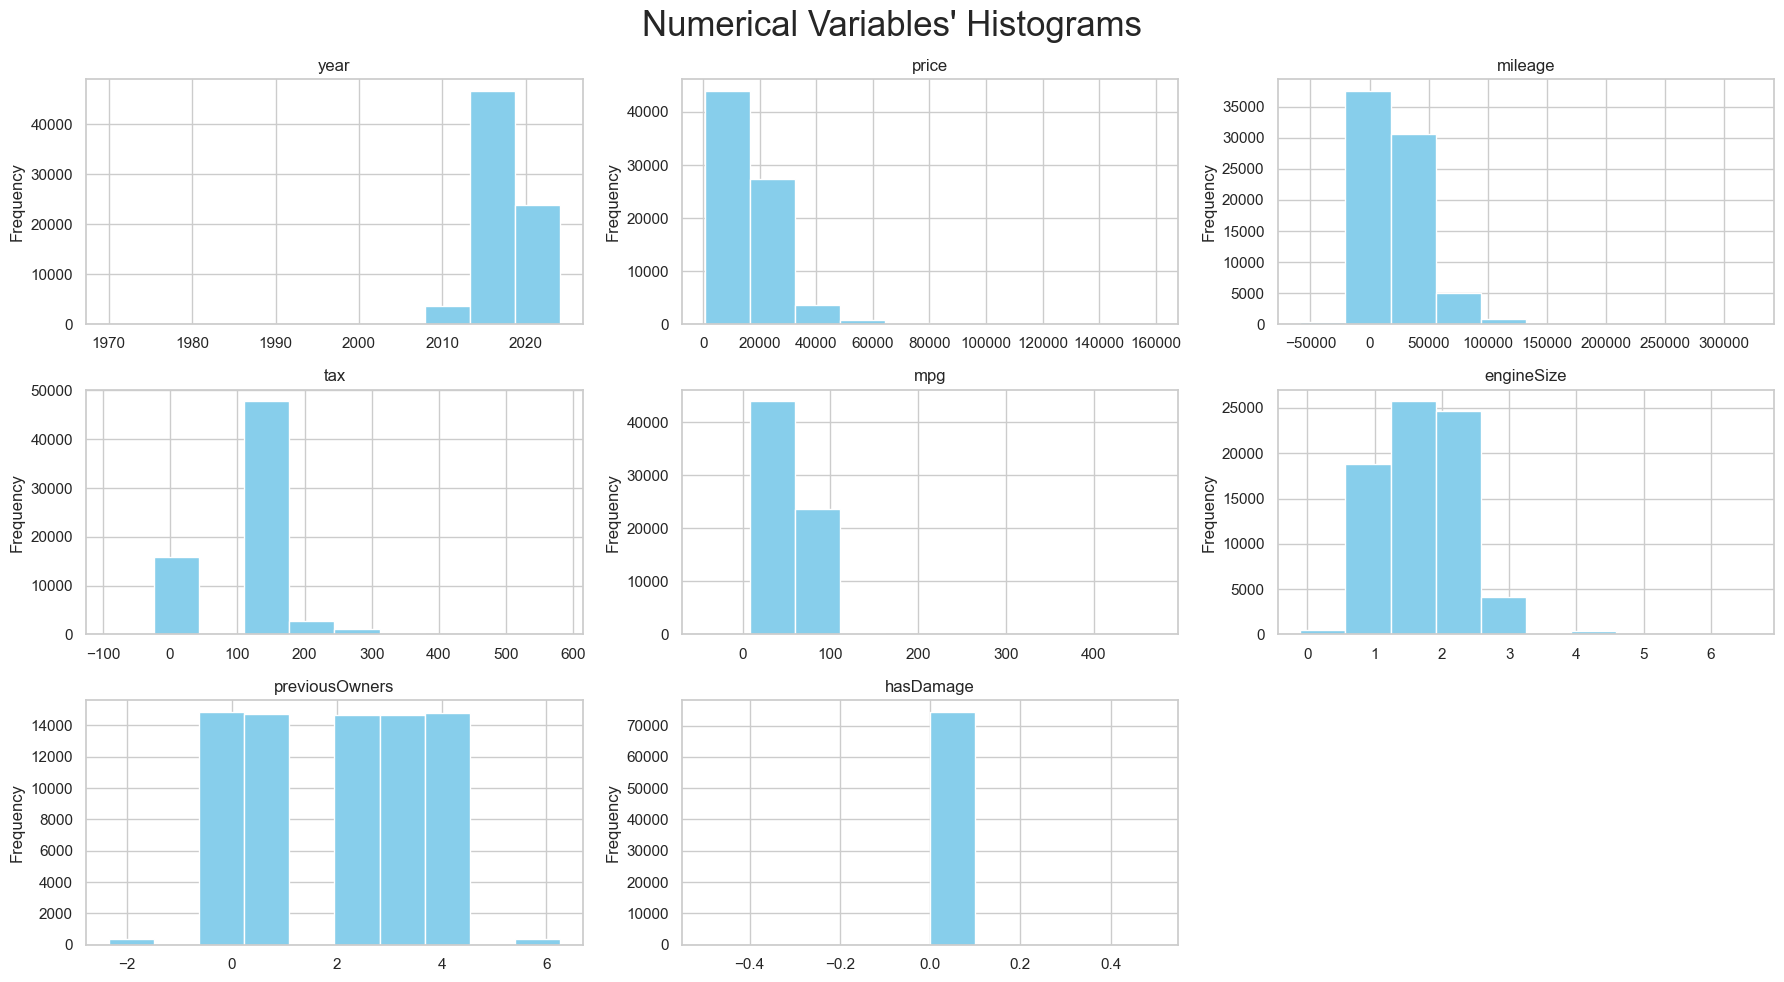

In [247]:
# We will put all the numeric variables' histograms in one figure

fig, axes = plt.subplots(ceil(len(numeric_features) / 3 ), 3, figsize=(18, 10))

for ax, feat in zip(axes.flatten(), numeric_features):
    ax.hist(df_train[feat], color = 'skyblue')
    ax.set_title(feat)
    ax.set_ylabel('Frequency')

# Delete empty plots
for ax in axes.flatten()[len(numeric_features):]:
    ax.axis('off')  


plt.suptitle("Numerical Variables' Histograms", fontsize=25)

plt.tight_layout()
plt.show()

Insights:  
- Price and mileage have a similar distribution.  
- Presence of negative values for 'mileage', 'tax', 'mpg', 'engineSize' and 'previousOwners'. 
- Most cars have low price and mileage, but there are cars in the data that are very expensive and some that have very big mileage (might be outliers but the distribution in typical for monetary variables).
- 'year' is more concentrated in the interval 2010-2025, however, it shows the presence of values until 1970.
- The distribution of 'tax', 'mpg' and 'engineSize' suggests that they have some outliers above the average.
- 'hasDamage' only has 0 as a value.

We will investigate the outliers.



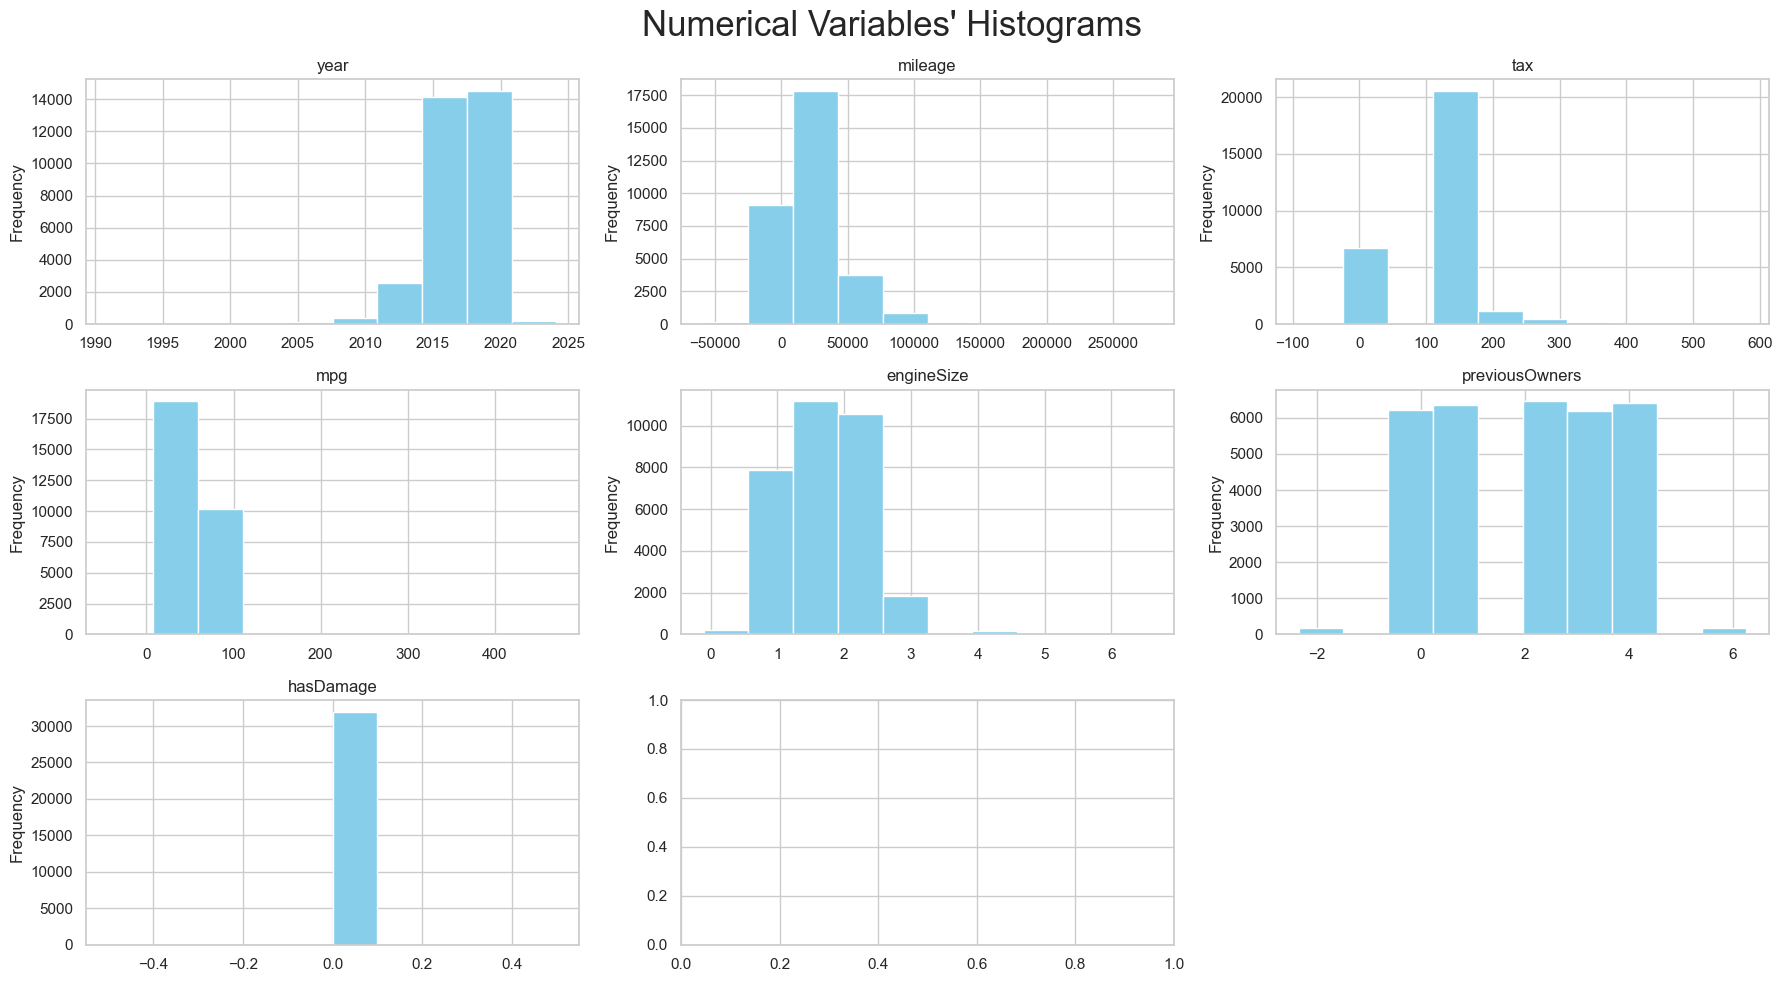

In [248]:
# We will put all the numeric variables' histograms in one figure
test_numeric_features = df_test.columns.drop(categorical_features)
fig, axes = plt.subplots(ceil(len(test_numeric_features) / 3 ), 3, figsize=(18, 10))

for ax, feat in zip(axes.flatten(), test_numeric_features):
    ax.hist(df_test[feat], color = 'skyblue')
    ax.set_title(feat)
    ax.set_ylabel('Frequency')

# Delete empty plots
for ax in axes.flatten()[len(numeric_features):]:
    ax.axis('off')  


plt.suptitle("Numerical Variables' Histograms", fontsize=25)

plt.tight_layout()
plt.show()

It looks like the distributions of the features is very similar to the ones in df_train, except from mileage which shows a much larger amount of negative values. This enforces the need to treat these inconsistencies.

### **Boxplots**

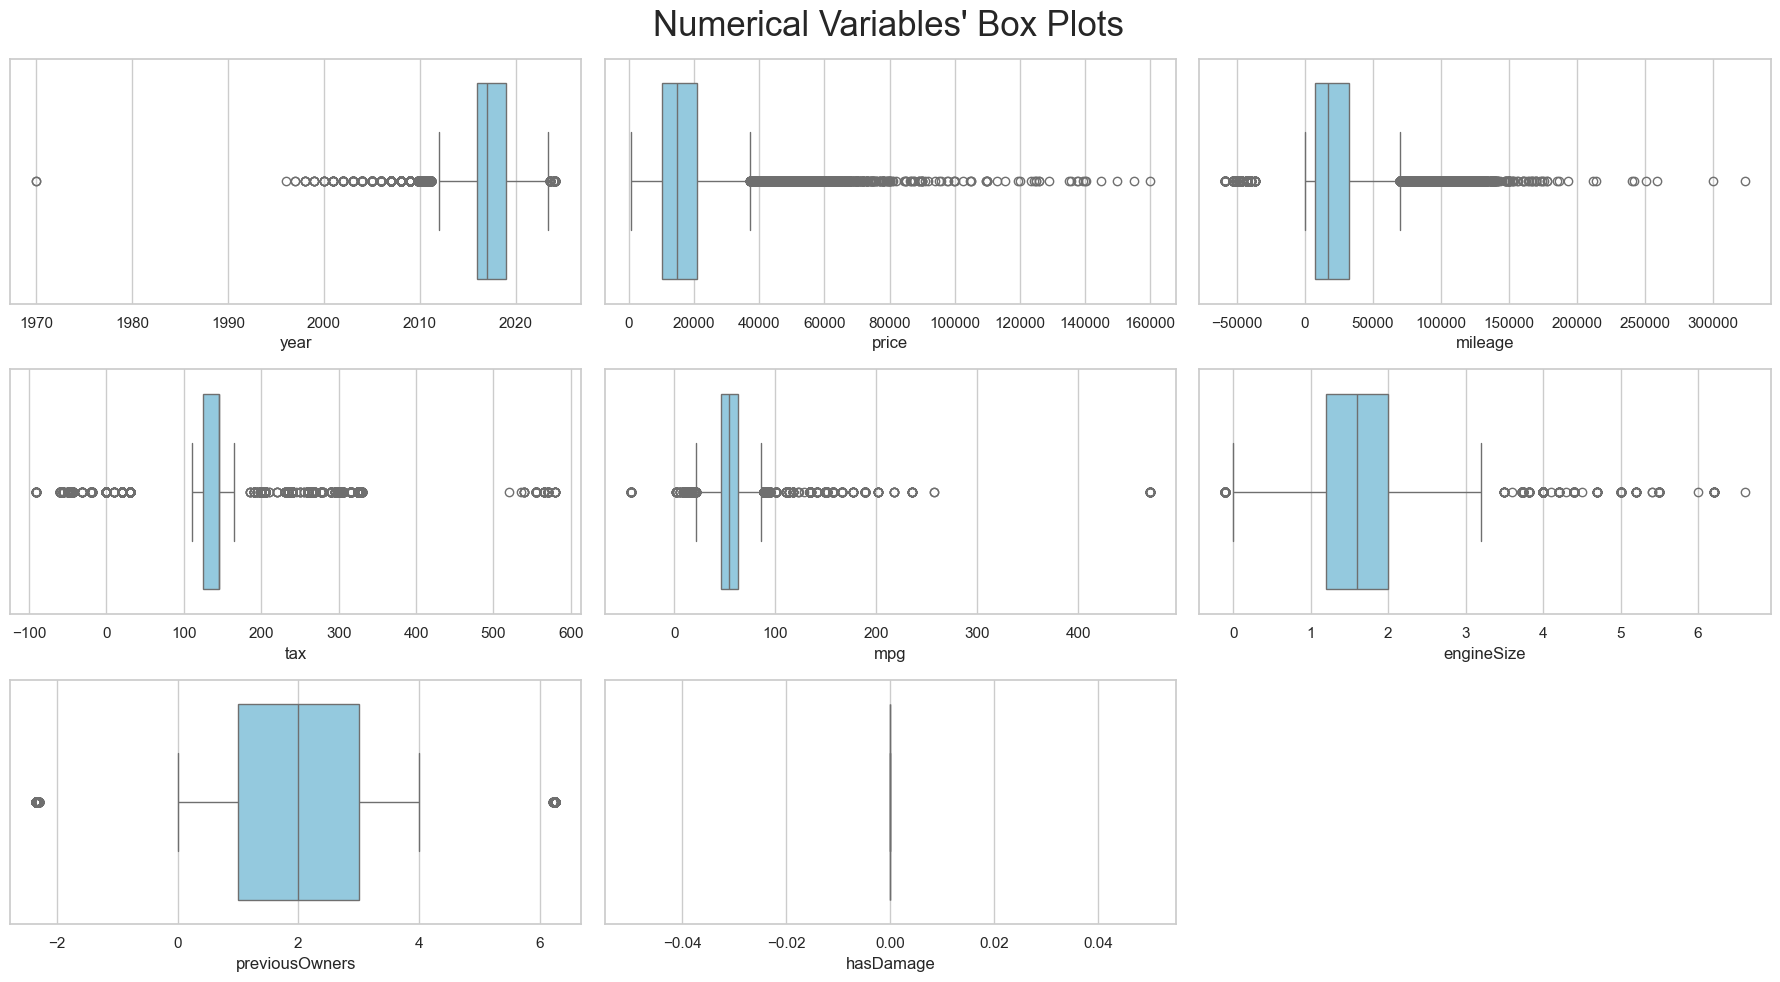

In [249]:

fig, axes = plt.subplots(ceil(len(numeric_features) / 3 ), 3, figsize = (18,10))

for ax, feat in zip(axes.flatten(), numeric_features):
    sns.boxplot(x=df_train[feat], ax=ax, color='skyblue')

# Delete empty plots
for ax in axes.flatten()[len(numeric_features):]:
    ax.axis('off')

plt.suptitle("Numerical Variables' Box Plots", fontsize=25)

plt.tight_layout()
plt.show()

The variables in the first 2 rows show multiple outliers, as suspected from the previous analysis.'previousOwners' also shows negative outliers and positive outliers (above 6)

In [250]:
df_train['hasDamage'].unique()

array([ 0., nan])

Analysing the histograms and boxplots above, the first issues we encounter in the numerical features in the dataset are:

- float years and years above 2020 (the data base is from 2020);
- negative mileage values;
- negative tax values;
- negative/zero mpg values;
- negative/zero engine sizes;
- previous owners with negative/float values;

We consider all of these values to be invalid within the context of each of these features. 

Additionally, there is a significant presence of outliers is most variables, except for hasDamage. The other features show very extreme outliers which results in a compressed distribution.

hasDamage is a particular case: it only contains two values, zero or NA. Hence, its boxplot consists of a single straight line at zero. Since according to the metadata this is a boolean variable, we will assume that zero hasDamage values correspond to cars with no damage and that the missing values correspond to cars with damage.

### **Correlations**

To measure the correlation between numerical variables we decided to use Spearman's coefficient, as it captures monotonic associations, not just linear ones. 

In [251]:
corr = df_train[numeric_features].corr(method="spearman")
corr = corr.round(2)
corr

,year,price,mileage,tax,mpg,engineSize,previousOwners,hasDamage
year,1.00,0.60,-0.78,0.32,-0.31,-0.04,0.0,NaN
price,0.60,1.00,-0.51,0.31,-0.39,0.56,-0.0,NaN
mileage,-0.78,-0.51,1.00,-0.25,0.32,0.10,0.0,NaN
tax,0.32,0.31,-0.25,1.00,-0.55,0.16,-0.0,NaN
mpg,-0.31,-0.39,0.32,-0.55,1.00,-0.20,0.0,NaN
engineSize,-0.04,0.56,0.10,0.16,-0.20,1.00,0.0,NaN
previousOwners,0.00,-0.00,0.00,-0.00,0.00,0.00,1.0,NaN
hasDamage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


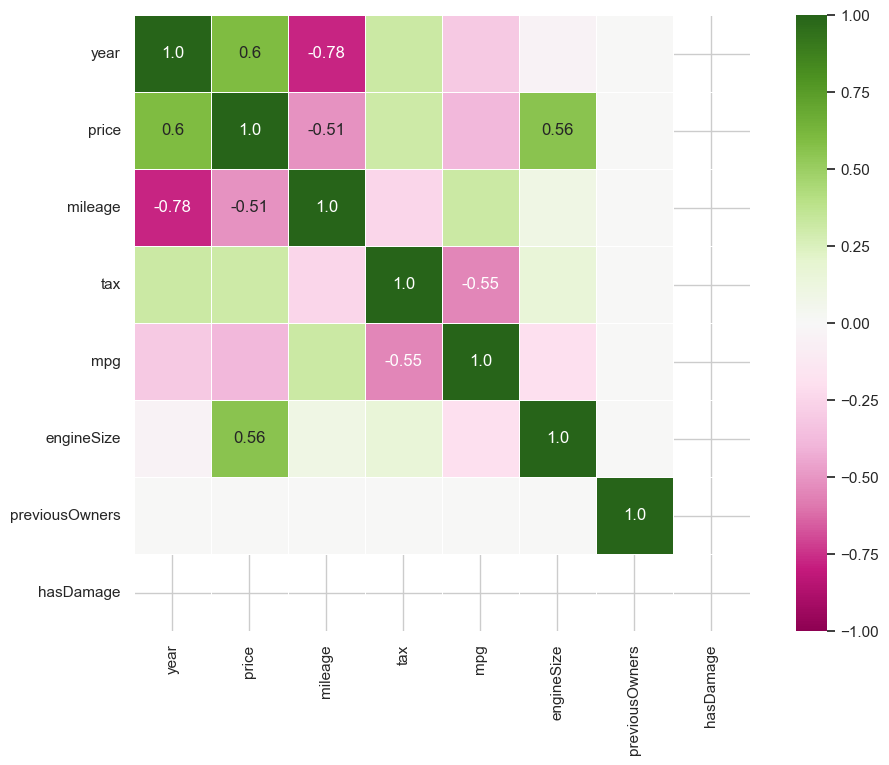

In [252]:

fig = plt.figure(figsize=(12, 8))

mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, corr.values, np.full(corr.shape,"")) 


# Plot heatmap of the correlation matrix
sns.heatmap(data=corr, 
            annot=annot, # Specify custom annotation
            fmt='s', # The annotation matrix now has strings, so we need to explicitly say this
            vmin=-1, vmax=1, 
            center=0, # Center the colormap at zero
            square=True, # Make each cell square-shaped
            linewidths=.5, # Add lines between cells
            cmap='PiYG' # Diverging color map
            )

plt.show()


'previousOwners' present almost no correlation with the remaining variables, which indicates some degree of irrelevance.

'mileage' and 'year' show strong correlation (in opposite directions).

'mpg' and 'tax' show medium correlation (in opposite directions).

'mpg' and 'year', 'tax' and 'mileage', 'tax' and 'year' show medium-low correlation.

'year', 'mileage' and 'engineSize' show the highest correlation with the target variable, 'price'. They could the numerical variables that will be more important to predict price.

The value of the correlations is probably very affected by the large amount of outliers, missing values and systematic errors.

### **Scatter Plots**


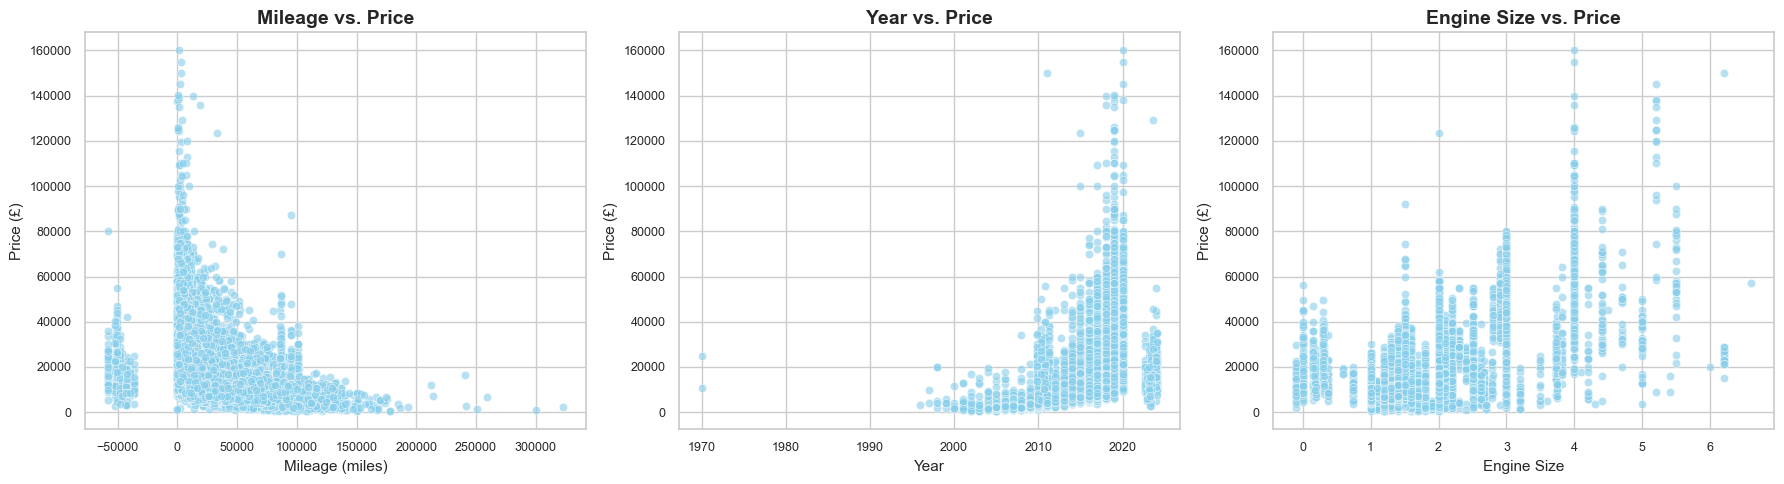

In [253]:
# we will plot scatter plots of the variables that seem to have higher correlation with 'price'
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables = ['mileage', 'year', 'engineSize']
titles = ['Mileage vs. Price', 'Year vs. Price', 'Engine Size vs. Price']
xlabels = ['Mileage (miles)', 'Year', 'Engine Size']

for i, (var, title, xlabels) in enumerate(zip(variables, titles, xlabels)):
    sns.scatterplot( data=df_train, x=var, y='price', ax=axes[i], alpha=0.6, color='skyblue' )
    
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel(xlabels, fontsize=11)
    axes[i].set_ylabel('Price (£)', fontsize=11)
    axes[i].tick_params(axis='both', labelsize=9)

plt.tight_layout()
plt.show()

The scatter plots are very noisy, as the data has not been treated yet. We can still spot the issues mentioned above.

Nonetheless, as expected, there is a large increase in price for cars with less mileage and older cars are cost less than more recent cars. When it comes to engine size, there seems to be an increase in price as the size increases, although more subtle than the year and mileage patterns.


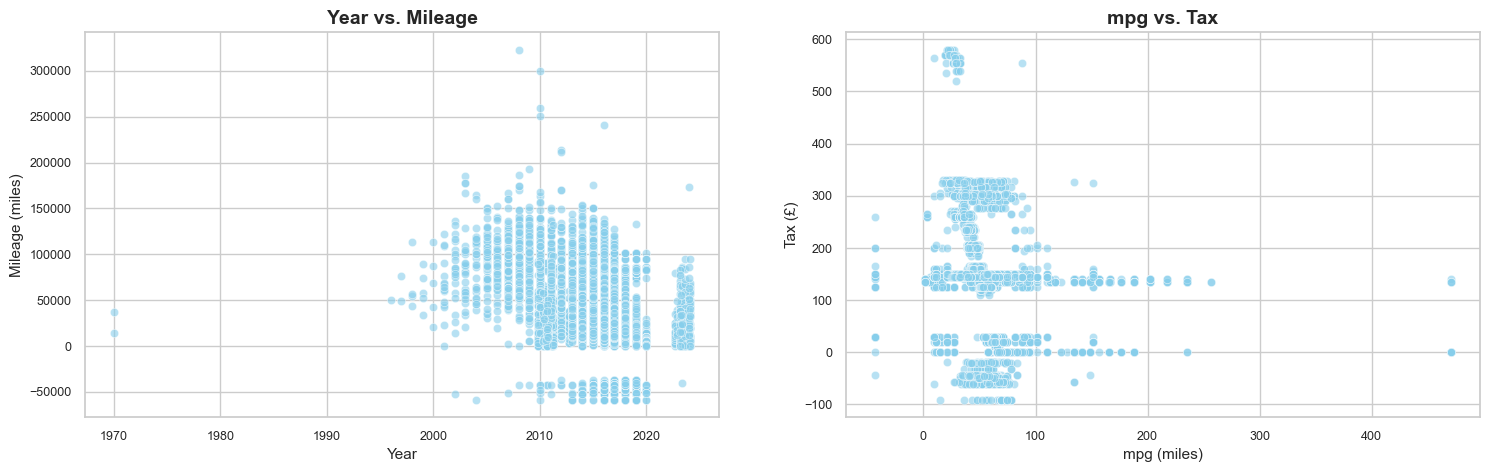

In [254]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

sns.scatterplot(data=df_train, x='year', y='mileage', ax=axes[0], alpha=0.6, color='skyblue')
axes[0].set_title('Year vs. Mileage', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year', fontsize=11)
axes[0].set_ylabel('Mileage (miles)', fontsize=11)
axes[0].tick_params(axis='both', labelsize=9)

sns.scatterplot(data=df_train, x='mpg', y='tax', ax=axes[1], alpha=0.6, color='skyblue')
axes[1].set_title('mpg vs. Tax', fontsize=14, fontweight='bold')
axes[1].set_xlabel('mpg (miles)', fontsize=11)
axes[1].set_ylabel('Tax (£)', fontsize=11)
axes[1].tick_params(axis='both', labelsize=9)



Again, the data is very noisy and in th Year vs. Mileage and mpg vs. Tax scatter plots it is harder to spot a pattern. 

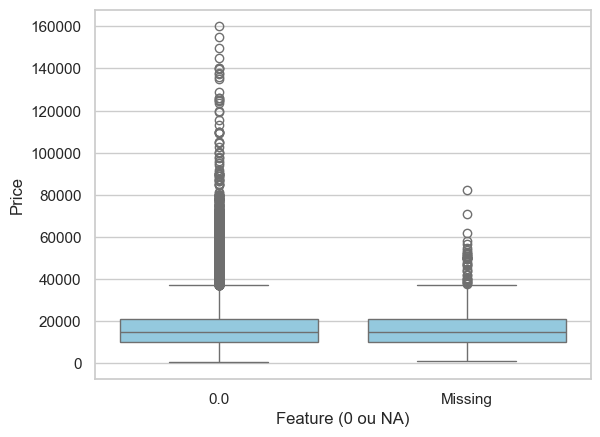

In [255]:
df_hd = df_train.copy()
df_hd['feature_cat'] = df_hd['hasDamage'].fillna('Missing')

sns.boxplot(x='feature_cat', y='price', data=df_hd, color='skyblue')
plt.xlabel('Feature (0 ou NA)')
plt.ylabel('Price')
plt.show()


By the discription of the variable we assumed that 0 meant that it has no Damage. This plots comes to show that the more expensive cars all have 0 in 'hasDamage' which support the assumption. In Data Preparation we will replace the missing values with 1 and typecast it to boolean

<h3 id="5th-bullet" style="background-color: #f7d888ff; color: #da6919ff; padding: 5px; margin: 5px;">
  <strong> 3. Data Preparation </strong>
</h3>


We will now perform some pre-processing of the variables to facilitate their treatment within the implementation of the hold-out method. It will also be helpful to create more clear visualizations


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Clean and pre-process the data </strong>
</h3>

As mentioned before, we are faced with the following challenges:

- years above 2020 (the data base is from 2020);
- negative mileage values;
- negative tax values;
- negative/zero mpg values;
- negative/zero engine size;
- previous owners with negative values;

It is also not possible to have 'engineSize' below 1 and 'mpg' below 8 for cars created after 1990.

We consider all of these values to be invalid within the context of each of these features and treat them as missing values. These will later be imputed along with the original missing values.

In [256]:
invalid_train = ((df_train['year']>2020) | (df_train['mileage']<0) | (df_train['tax']<0) | 
           (df_train['mpg']<=0)  | (df_train['previousOwners']< 0) | (df_train['engineSize']<= 0))


invalid_ratio = round(df_train[invalid_train].shape[0]/ df_train.shape[0] * 100,2)
# 
print(f"Rows with invalid values account for {invalid_ratio}% of the original train set.")

Rows with invalid values account for 2.31% of the original train set.


In [257]:
df_train.loc[df_train['year']>2020, 'year'] = np.nan
df_test.loc[df_test['year']>2020, 'year'] = np.nan

df_train.loc[df_train['mileage']<0, 'mileage'] = np.nan
df_test.loc[df_test['mileage']<0, 'mileage'] = np.nan

df_train.loc[df_train['tax']<0, 'tax'] = np.nan
df_test.loc[df_test['tax']<0,'tax'] = np.nan

df_train.loc[df_train['mpg']<=0, 'mpg'] = np.nan
df_test.loc[df_test['mpg']<=0, 'mpg'] = np.nan

df_train.loc[df_train['previousOwners']< 0, 'previousOwners'] = np.nan
df_test.loc[df_test['previousOwners']< 0, 'previousOwners'] = np.nan

df_train.loc[df_train['engineSize']<= 0, 'engineSize'] = np.nan
df_test.loc[df_test['engineSize']<= 0, 'engineSize'] = np.nan


Additionally, years and previous owners should be whole numbers, so we will round them using the floor function and typecast them into integers.

In [258]:
df_train['year'] = np.floor(df_train['year'])
df_train['previousOwners'] = np.floor(df_train['previousOwners'])

df_test['year'] = np.floor(df_test['year'])
df_test['previousOwners'] = np.floor(df_test['previousOwners'])

There are two other issues:

- really low mpg values (a good standard value for cars from after the 2000s should be around 40 mpg); for example the minimum year for cars below 15 mpg in our dataset is 2005, which is not feasible.

- really small engine sizes: a minimum standard value should be 1 L;

For these reasons, we will replace mpg values below 40 and engine sizes below 1 L with missing values to be treated later.

In [259]:
df_train.loc[df_train['mpg']<8, 'year'].describe()

count      19.000000
mean     2019.684211
std         0.582393
min      2018.000000
25%      2019.500000
50%      2020.000000
75%      2020.000000
max      2020.000000
Name: year, dtype: float64

In [260]:
df_train.loc[df_train['mpg'] < 40, 'mpg'] = np.nan
df_train.loc[df_train['engineSize'] < 1, 'engineSize'] = np.nan

df_test.loc[df_test['mpg'] < 40, 'mpg'] = np.nan
df_test.loc[df_test['engineSize'] < 1, 'engineSize'] = np.nan

We'll also round the floats to two decimal places.

In [261]:
for feat in ['mileage', 'tax', 'mpg', 'engineSize']:
    df_train[feat] = df_train[feat].round(2)
    df_test[feat] = df_test[feat].round(2)


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Pre-Processing of Categorical Variables </strong>
</h3>

Pre-processing the categorical variables will allow for an easier treatment. Therefore, we will transform all the categorical features into strings, strip them of leading and trace spaces and convert them to upper case.

In [262]:
# Pre processing the categorical variables to be easier to find clusters in typos:
    # remove spaces (at the beginning and end) and uppercase all letters
    # does not replace NaN's
df_train['Brand'] = df_train['Brand'].where(df_train['Brand'].isna(), df_train['Brand'].astype(str).str.strip().str.upper())
df_test['Brand']  = df_test['Brand'].where(df_test['Brand'].isna(), df_test['Brand'].astype(str).str.strip().str.upper())

df_train['model'] = df_train['model'].where(df_train['model'].isna(), df_train['model'].astype(str).str.strip().str.upper())
df_test['model']  = df_test['model'].where(df_test['model'].isna(), df_test['model'].astype(str).str.strip().str.upper())

df_train['fuelType'] = df_train['fuelType'].where(df_train['fuelType'].isna(), df_train['fuelType'].astype(str).str.strip().str.upper())
df_test['fuelType']  = df_test['fuelType'].where(df_test['fuelType'].isna(), df_test['fuelType'].astype(str).str.strip().str.upper())

df_train['transmission'] = df_train['transmission'].where(df_train['transmission'].isna(), df_train['transmission'].astype(str).str.strip().str.upper())
df_test['transmission']  = df_test['transmission'].where(df_test['transmission'].isna(), df_test['transmission'].astype(str).str.strip().str.upper())


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Hold-Out Method </strong>
</h3>

We will apply hold-out method to the train dataset in order to treat the typos in the categorical variables, missing values and outliers. This approach allows us to understand how our data-treatment steps affect the dataset and whether they are effective. In the next notebook, these steps will be recreated, but this time embedded within a pipeline and combined with other preprocessing tasks such as scaling, feature engineering, and feature selection.

We start by separating the target variable from the remaining variables and then splitting both sets into train and validation sets, using train_test_split from sklearn. We will use a 80%-20% train-validation proportion for this. 

In [263]:
target = df_train['price']
data = df_train.drop(['price'],axis=1)

In [264]:
X_train, X_val, y_train, y_val = train_test_split(data, 
                                                 target, 
                                                 test_size=0.3, 
                                                 random_state=15, 
                                                 shuffle=True)


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Treatment of Categorical Variables </strong>
</h3>

##### *Brands*

In [265]:
brands = X_train['Brand'].dropna().unique().tolist()
print(f" Typos in brands: {brands}")

 Typos in brands: ['MERCEDES', 'VW', 'AUDI', 'FORD', 'TOYOTA', 'BMW', 'SKODA', 'OPEL', 'HYUNDAI', 'OPE', 'W', 'BM', 'KODA', 'PEL', 'TOYOT', 'OYOTA', 'V', 'ERCEDES', 'UDI', 'FOR', 'SKOD', 'MERCEDE', 'HYUNDA', 'ORD', 'YUNDAI', 'AUD', 'MW', 'ERCEDE', 'OR', 'PE', 'UD', 'KOD', 'YUNDA']


In [266]:
print(f"Train value counts {X_train[X_train['Brand'].isin(['VW','BMW','W'])]['Brand'].value_counts()}")
print(f"Val value counts {X_val[X_val['Brand'].isin(['VW','BMW','W'])]['Brand'].value_counts()}")
print(f"Test value counts {df_test[df_test['Brand'].isin(['VW','BMW','W'])]['Brand'].value_counts()}")

Train value counts Brand
VW     7012
BMW    4960
W       148
Name: count, dtype: int64
Val value counts Brand
VW     2961
BMW    2142
W        60
Name: count, dtype: int64
Test value counts Brand
VW     4286
BMW    3041
W        88
Name: count, dtype: int64


In Brands we have the value 'W' which could mean VW or BMW. We designed a funtion called correct_brand_w that has the goal of identifying wether the 'W' meant 'VW' or 'BMW'. For that, it will select the corresponding model and search, in the train dataset, for an observation with the same model. Finally it will return it's brand. 

In [267]:
# Correct the  'W' values in the columns 'Brand' by applying the function correct_brand_w to all elements in the column
X_train['Brand'] = X_train.apply(lambda row: correct_brand_w(X_train, row['Brand'], row['model']),axis=1)
X_val['Brand'] = X_val.apply(lambda row: correct_brand_w(X_train, row['Brand'], row['model']), axis = 1)
df_test['Brand'] = df_test.apply(lambda row: correct_brand_w(X_train, row['Brand'], row['model']), axis = 1)

In [268]:
print(f"Train value counts {X_train[X_train['Brand'].isin(['VW','BMW','W'])]['Brand'].value_counts()}")
print(f"Val value counts {X_val[X_val['Brand'].isin(['VW','BMW','W'])]['Brand'].value_counts()}")
print(f"Test value counts {df_test[df_test['Brand'].isin(['VW','BMW','W'])]['Brand'].value_counts()}")

Train value counts Brand
VW     7158
BMW    4960
W         2
Name: count, dtype: int64
Val value counts Brand
VW     3020
BMW    2142
W         1
Name: count, dtype: int64
Test value counts Brand
VW     4372
BMW    3041
W         2
Name: count, dtype: int64


Conseguimos consluir que todas as observações que tinham 'W' em brand eram na verdade 'VW', não 'BMW'

In [269]:
print(f"Train: {X_train[(X_train['Brand']=='W')]}\n\n")
print(f"Validation: {X_val[(X_val['Brand']=='W')]}\n\n")
print(f"Test: {df_test[(df_test['Brand']=='W')]}")

Train:       Brand model    year transmission  mileage fuelType    tax   mpg  \
carID                                                                   
74210     W   NaN  2019.0    SEMI-AUTO   3700.0   DIESEL  145.0  52.3   
66941     W   NaN  2019.0    AUTOMATIC   6000.0      NaN  145.0   NaN   

       engineSize  previousOwners  hasDamage  
carID                                         
74210         2.0             3.0        0.0  
66941         1.5             3.0        0.0  


Validation:       Brand model    year transmission  mileage fuelType    tax   mpg  \
carID                                                                   
65456     W   NaN  2019.0       MANUAL   3000.0   DIESEL  145.0  57.7   

       engineSize  previousOwners  hasDamage  
carID                                         
65456         1.6             2.0        0.0  


Test:        Brand model    year transmission  mileage fuelType    tax  mpg  \
carID                                                   

We can see that we fixed the problem with the brand 'w' except for the cases with null values in model. The ones that were fixed were all 'VW' so we will assume the same for these. All observations in the train dataset with 'W' in brand correspond to 'VW'. Since the function we created searches for a match in model only in the train data set (to avoid data leakage) we can will assume that this remains true for the other datasets. Consequently, in the next notebook we will simply replace all observations with 'W' in brand by 'VW' without resorting to the auxiliary function

In [270]:
X_train.loc[X_train['Brand'] =='W' ,'Brand'] = 'VW'

X_val.loc[X_val['Brand'] =='W' ,'Brand'] = 'VW'

df_test.loc[df_test['Brand'] =='W' ,'Brand'] = 'VW'

print(X_train[X_train['Brand'] =='W'], '\n\n')
print(X_val[X_val['Brand'] =='W'], '\n\n')
print(df_test[df_test['Brand']=='W'])


Empty DataFrame
Columns: [Brand, model, year, transmission, mileage, fuelType, tax, mpg, engineSize, previousOwners, hasDamage]
Index: [] 


Empty DataFrame
Columns: [Brand, model, year, transmission, mileage, fuelType, tax, mpg, engineSize, previousOwners, hasDamage]
Index: [] 


Empty DataFrame
Columns: [Brand, model, year, transmission, mileage, fuelType, tax, mpg, engineSize, previousOwners, hasDamage]
Index: []


For all variables, we will follow the same logic. We will group the typos into clusters based only on the typos from the **training data**. Then, we will correct the errors in training, validation and testing based on the created clusters. If the typo isnt in the clusters we'll try to match it to correct values from train.

Lets correct the typos:

TheFuzz uses the Levenshtein edit distance to calculate the degree of closeness between two strings.

**Levenshtein distance** = at a minimum, how many edits are required to change one string into the other.

In [271]:
brands = X_train['Brand'].dropna().unique().tolist()

In [272]:
set([len(brand) for brand in brands])

{1, 2, 3, 4, 5, 6, 7, 8}

[https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings]

[https://medium.com/@laxmi17sarki/string-matching-using-fuzzywuzzy-24be9e85c88d]

**Ratio choice**: fuzz.WRatio, most robust method

In [273]:
 # create_clusters will create a groups of similar typos and select the correct value as the mode of
 # each cluster. In the mapping dictionary each key is a typo and the value is the correct brand name 
clusters, mapping = create_clusters(X_train, brands, 'Brand')

print("Clusters:")
for c in clusters:
    print(c)

# we will now replace the typos in 'Brand' using the mapping dictionary created
X_train['Brand_cleaned'] = X_train['Brand'].apply(lambda x: correct_categorical(mapping, x))
X_val['Brand_cleaned'] = X_val['Brand'].apply(lambda x: correct_categorical(mapping, x))
df_test['Brand_cleaned'] = df_test['Brand'].apply(lambda x: correct_categorical(mapping, x))

print("\nCleaned brand - Train:")
print(X_train['Brand_cleaned'].dropna().unique())

print("\nCleaned brand - Validation:")
print(X_val['Brand_cleaned'].dropna().unique())

print("\nCleaned brand - Test:")
print(df_test['Brand_cleaned'].dropna().unique())


Clusters:
['MERCEDES', 'ERCEDES', 'MERCEDE', 'ERCEDE']
['VW', 'V']
['AUDI', 'UDI', 'AUD', 'UD']
['FORD', 'FOR', 'ORD', 'OR']
['TOYOTA', 'TOYOT', 'OYOTA']
['BMW', 'BM', 'MW']
['SKODA', 'KODA', 'SKOD', 'KOD']
['OPEL', 'OPE', 'PEL', 'PE']
['HYUNDAI', 'HYUNDA', 'YUNDAI', 'YUNDA']

Cleaned brand - Train:
['MERCEDES' 'VW' 'AUDI' 'FORD' 'TOYOTA' 'BMW' 'SKODA' 'OPEL' 'HYUNDAI']

Cleaned brand - Validation:
['BMW' 'OPEL' 'AUDI' 'MERCEDES' 'FORD' 'TOYOTA' 'VW' 'HYUNDAI' 'SKODA']

Cleaned brand - Test:
['HYUNDAI' 'VW' 'BMW' 'OPEL' 'FORD' 'MERCEDES' 'SKODA' 'TOYOTA' 'AUDI']


We can see that the types were grouped well and so was the correct value chosen

#### *Transmission*

In [274]:
transmission_types = X_train['transmission'].dropna().unique().tolist()
print(f" Typos in models: {transmission_types}")

 Typos in models: ['SEMI-AUT', 'AUTOMATIC', 'SEMI-AUTO', 'MANUAL', 'MANUA', 'ANUAL', 'AUTOMATI', 'UNKNOW', 'UNKNOWN', 'UTOMATIC', 'EMI-AUTO', 'ANUA', 'NKNOWN', 'OTHER', 'UTOMATI', 'EMI-AUT', 'NKNOW']


In [275]:
# Creates clusters with similar fuel types
clusters, mapping = create_clusters(X_train, transmission_types, 'transmission')

X_train['transmission_cleaned'] = X_train['transmission'].apply(lambda x: correct_categorical(mapping, x))
X_val['transmission_cleaned'] = X_val['transmission'].apply(lambda x: correct_categorical(mapping, x))
df_test['transmission_cleaned'] = df_test['transmission'].apply(lambda x: correct_categorical(mapping, x))

print("Clusters:")
for c in clusters:
    print(c)

print("\nCleaned transmission - Train:")
print(X_train['transmission_cleaned'].dropna().unique())

print("\nCleaned transmission - Validation:")
print(X_val['transmission_cleaned'].dropna().unique())

print("\nCleaned transmission - Test:")
print(df_test['transmission_cleaned'].dropna().unique())

Clusters:
['SEMI-AUT', 'SEMI-AUTO', 'EMI-AUTO', 'EMI-AUT']
['AUTOMATIC', 'AUTOMATI', 'UTOMATIC', 'UTOMATI']
['MANUAL', 'MANUA', 'ANUAL', 'ANUA']
['UNKNOW', 'UNKNOWN', 'NKNOWN', 'NKNOW']
['OTHER']

Cleaned transmission - Train:
['SEMI-AUTO' 'AUTOMATIC' 'MANUAL' 'UNKNOWN' 'OTHER']

Cleaned transmission - Validation:
['SEMI-AUTO' 'MANUAL' 'AUTOMATIC' 'UNKNOWN' 'OTHER']

Cleaned transmission - Test:
['AUTOMATIC' 'SEMI-AUTO' 'MANUAL' 'UNKNOWN' 'OTHER']


The cleaning was successful

#### *Fuel Types*

In [276]:
fuel_types=X_train['fuelType'].dropna().unique().tolist()
print(f" Typos in models: {fuel_types}")

 Typos in models: ['DIESEL', 'PETROL', 'DIESE', 'HYBRID', 'IESEL', 'PETRO', 'ETROL', 'YBRID', 'ELECTRIC', 'IESE', 'OTHER', 'HYBRI', 'ETRO', 'THER', 'OTHE', 'YBRI']


In [277]:
# Creates clusters with similar fuel types
clusters, mapping = create_clusters(X_train,fuel_types, 'fuelType')

X_train['fuelType_cleaned'] = X_train['fuelType'].apply(lambda x: correct_categorical(mapping, x))
X_val['fuelType_cleaned'] = X_val['fuelType'].apply(lambda x: correct_categorical(mapping, x))
df_test['fuelType_cleaned'] =  df_test['fuelType'].apply(lambda x: correct_categorical(mapping, x))

print("Clusters:")
for c in clusters:
    print(c)

print("\nCleaned fuel type - Train:")
print(X_train['fuelType_cleaned'].dropna().unique())

print("\nCleaned fuel type - Validation:")
print(X_val['fuelType_cleaned'].dropna().unique())

print("\nCleaned fuel type - Test:")
print(df_test['fuelType_cleaned'].dropna().unique())

Clusters:
['DIESEL', 'DIESE', 'IESEL', 'IESE']
['PETROL', 'PETRO', 'ETROL', 'ETRO']
['HYBRID', 'YBRID', 'HYBRI', 'YBRI']
['ELECTRIC']
['OTHER', 'THER', 'OTHE']

Cleaned fuel type - Train:
['DIESEL' 'PETROL' 'HYBRID' 'ELECTRIC' 'OTHER']

Cleaned fuel type - Validation:
['DIESEL' 'PETROL' 'HYBRID' 'OTHER']

Cleaned fuel type - Test:
['PETROL' 'DIESEL' 'HYBRID' 'OTHER' 'ELECTRIC']


Just like with 'transmission' and 'Brand', the typos in 'fuelType' were grouped well and the mapping was also well done. 

#### *Models*

In [278]:
models= X_train['model'].dropna().unique().tolist()
print(f"Nº of unique values: {len(models)}")

Nº of unique values: 283


In [279]:
set([len(str(model)) for model in models])

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 20, 21}

Fuzzywuzzy wasnt able to group the same models in the column 'model', so for this case we will use get_close_matches from difflib:  

https://docs.python.org/3/library/difflib.html

The difflib library calculates similarity not by the Levenshtein distance, but rather by the size of the biggest subsequence in common. It uses the formula: 

**ratio = (2 * M) / T**  

Where M = number of elements of the longest common sequence (LCS). T = total size of the sequences.


**Exemple:**  

a = 'CLS CLASS'  
b = 'CLS CLAS'

LCS = 'CLS CLAS' -> 8 characters in common so M = 8  
T = len(a) + len(b) = 9 + 8 = 17

ratio = (2 * 8) / 17 = 0.9412

**Note:** if a = 'FIESTA', b = 'FITESA'. Then, LCS = 'FIESA'. It does not matter if there are different letter in the middle, what matters is that the same letters are in the same order.


Then the get_close_matches will calculate this ratio between the word (str) and the possibilities (list). You can specify the number of matches you want to have (n) or/and the cutoff.

Although the function used to calculate similarity is different, the process of cleaning the typos will be the same. 

In [280]:
clusters, mapping = similar_models (df_train, models)

print("Clusters:")
for c in clusters:
    print(c)

X_train['model_cleaned'] = X_train['model'].apply(lambda x: correct_column_model(x, mapping))
X_val['model_cleaned'] = X_val['model'].apply(lambda x: correct_column_model(x, mapping))
df_test['model_cleaned'] =  df_test['model'].apply(lambda x: correct_column_model(x, mapping))


print("\nCleaned model - Train:")
print(X_train['model_cleaned'].dropna().unique())

print("\nCleaned model - Validation:")
print(X_val['model_cleaned'].dropna().unique())

print("\nCleaned model - Test:")
print(df_test['model_cleaned'].dropna().unique())

Clusters:
['CLS CLASS', 'CLS CLAS']
['TIGUAN', 'TIGUA']
['PASSAT', 'PASSA']
['GLC CLASS', 'GLC CLAS']
['A5']
['A6']
['AYGO', 'AYG']
['3 SERIES', '3 SERIE']
['FABIA', 'FABI']
['FOCUS', 'FOCU']
['MONDEO', 'MONDE']
['CORSA', 'CORS']
['2 SERIES', '2 SERIE']
['YARIS', 'YARI']
['I30']
['GRAND TOURNEO CONNECT', 'GRAND TOURNEO CONNEC']
['S-MAX', 'S-MA']
['E CLASS', 'E CLAS']
['CROSSLAND X', 'CROSSLAND']
['Q2']
['PRIUS']
['FIESTA', 'FIEST']
['POLO', 'POL']
['I10']
['ASTRA', 'ASTR']
['OCTAVIA', 'OCTAVI']
['Q3']
['GOLF', 'GOL']
['MOKKA X']
['KA+']
['SCALA', 'SCAL']
['ECOSPORT', 'ECOSPOR']
['7 SERIES', '7 SERIE']
['KUGA', 'KUG']
['T-CROSS', 'T-CROS']
['C CLASS', 'C CLAS']
['AURIS', 'AURI']
['PUMA']
['MOKKA', 'MOKK']
['COROLLA', 'COROLL']
['INSIGNIA', 'INSIGNI']
['1 SERIES', '1 SERIE']
['A4']
['GLA CLASS', 'GLA CLAS']
['IONIQ', 'IONI']
['CC']
['COMBO LIFE', 'COMBO LIF']
['8 SERIES', '8 SERIE']
['X1']
['RAV4', 'RAV']
['T-ROC', 'T-RO']
['C-MAX', 'C-MA']
['SL CLASS', 'SL CLAS']
['ZAFIRA', 'ZAFIR']
['V

We have successfully corrected the typos in the data. 


<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Treatment of Numerical Variables </strong>
</h3>

### **Outlier Analysis**

We are now left with outliers, which we will analyse using IQR.

In [281]:
num_feats = ['year', 'mileage', 'tax', 'mpg', 'previousOwners', 'engineSize']

# data frame to assess multi-dimension outliers
outlier_df = pd.DataFrame(False, index=X_train.index, columns=num_feats)
upper_bounds = {}
lower_bounds = {}
# detecting outliers for each numerical feat using IQR method
for feat in num_feats:
    Q1 = X_train[feat].quantile(0.25) 
    Q3 = X_train[feat].quantile(0.75)
    IQR = Q3 - Q1
    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR
    upper_bounds[feat] = upper # saving IQR bounds of train set to use on validation and test sets
    lower_bounds[feat] = lower

    outlier_mask = ((X_train[feat] < lower) | (X_train[feat] > upper))

    outliers = X_train[outlier_mask]

    print(f"{feat}: {len(outliers)} outliers ({round(len(outliers)/len(X_train),2)}%)\n")


year: 1126 outliers (0.02%)

mileage: 2242 outliers (0.04%)

tax: 14004 outliers (0.26%)

mpg: 563 outliers (0.01%)

previousOwners: 0 outliers (0.0%)

engineSize: 421 outliers (0.01%)



In variables where we find it appropriate, we will apply winsorization at either the 1st percentile (for lower-bound IQR outliers), 99th percentile (for upper-bound IQR outliers), or both, affecting 1-2% of data per variable. 

We didn't choose these percentiles taking into account the percentage of outliers within each variable, because if we did, we would end up attributing artificial values to a large amount of outliers that represent genuine values within the context of the dataset.  Instead, we selected these percentiles as to minimize their influence on the model while still addressing extreme values.

- Year: winsorization at 1th percentile:

In [282]:
lower_cap_year = X_train['year'].quantile(0.01)
X_train.loc[X_train['year'] < lower_cap_year,'year'] = lower_cap_year
X_val.loc[X_val['year'] < lower_cap_year,'year'] = lower_cap_year
df_test.loc[df_test['year'] < lower_cap_year,'year'] = lower_cap_year

- Mileage: winsorization at 99th percentile

In [283]:
upper_cap_mile = X_train['mileage'].quantile(0.99)
X_train.loc[X_train['mileage'] > upper_cap_mile,'mileage'] = upper_cap_mile
X_val.loc[X_val['mileage'] > upper_cap_mile,'mileage'] = upper_cap_mile
df_test.loc[df_test['mileage'] > upper_cap_mile,'mileage'] = upper_cap_mile

- Tax: winsorization at 1th and 99th percentile

In [284]:
upper_cap_tax = X_train['tax'].quantile(0.99)
X_train.loc[X_train['tax'] > upper_cap_tax,'tax'] = upper_cap_tax
X_val.loc[X_val['tax'] > upper_cap_tax,'tax'] = upper_cap_tax
df_test.loc[df_test['tax'] > upper_cap_tax,'tax'] = upper_cap_tax

lower_cap_tax = X_train['tax'].quantile(0.01)
X_train.loc[X_train['tax'] < lower_cap_tax,'tax'] = lower_cap_tax
X_val.loc[X_val['tax'] < lower_cap_tax,'tax'] = lower_cap_tax
df_test.loc[df_test['tax'] < lower_cap_tax,'tax'] = lower_cap_tax

- mpg: winsorization at 99th percentile

In [285]:
upper_cap_mpg = X_train['mpg'].quantile(0.99)
X_train.loc[X_train['mpg'] > upper_cap_mpg,'mpg'] = upper_cap_mpg
X_val.loc[X_val['mpg'] > upper_cap_mpg,'mpg'] = upper_cap_mpg
df_test.loc[df_test['mpg'] > upper_cap_mpg,'mpg'] = upper_cap_mpg

- engineSize: winsorization at 99th percentile

In [286]:
upper_cap_engine = X_train['engineSize'].quantile(0.99)
X_train.loc[X_train['engineSize'] > upper_cap_engine,'engineSize'] = upper_cap_engine
X_val.loc[X_val['engineSize'] > upper_cap_engine,'engineSize'] = upper_cap_engine
df_test.loc[df_test['engineSize'] > upper_cap_engine,'engineSize'] = upper_cap_engine

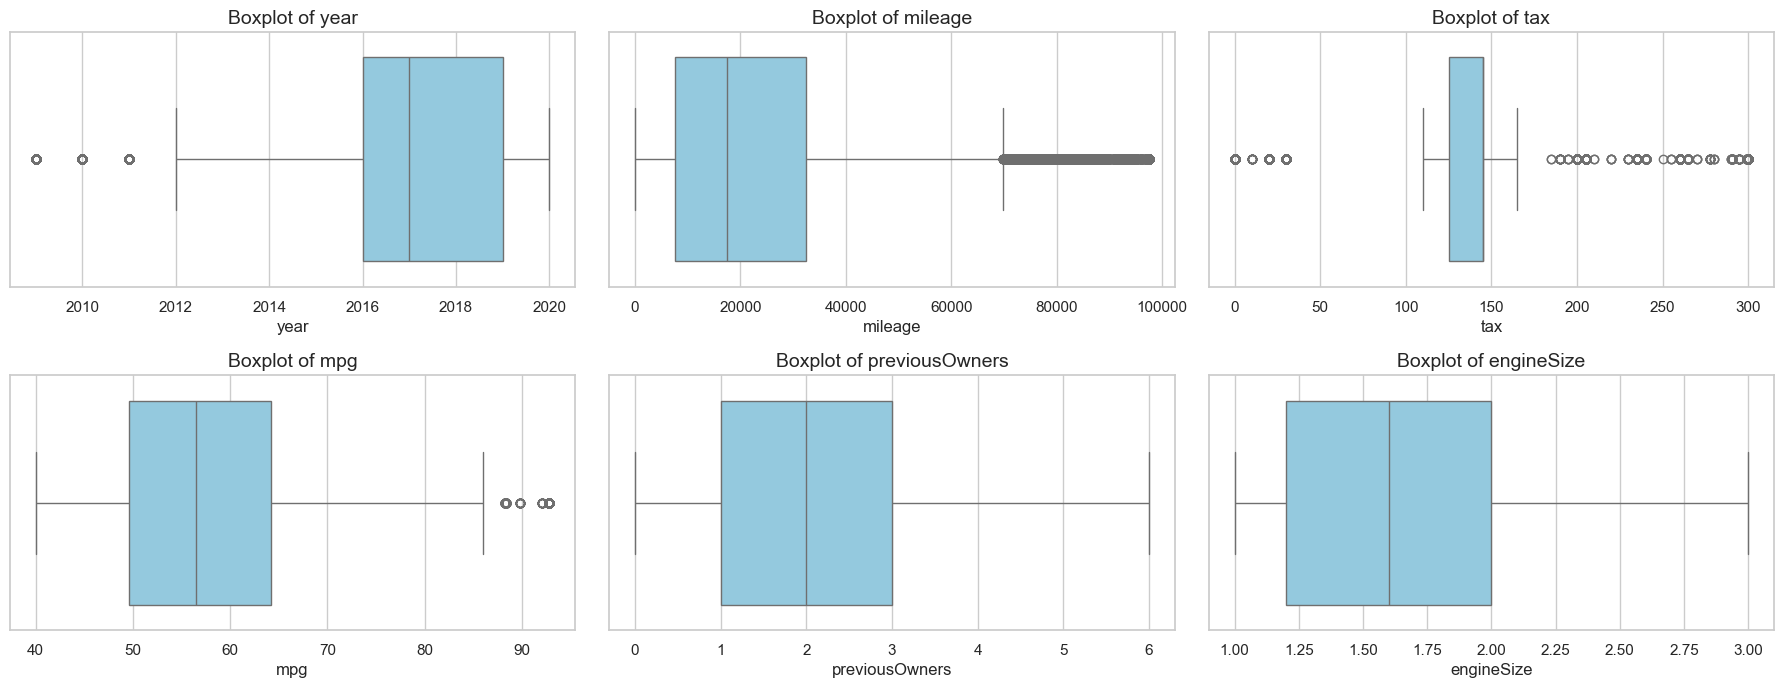

In [287]:
fig, axes = plt.subplots(3, 3, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(num_feats):
    sns.boxplot(x=X_train[var], ax=axes[i], orient='h', color='skyblue')
    axes[i].set_title(f"Boxplot of {var}", fontsize=14)
    axes[i].set_xlabel(var, fontsize=12)
    axes[i].set_ylabel('')

for i in range(len(num_feats), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

Through winsorization we have diminished the amount of outliers, but some prevail. Some models will be able to deal with these extreme values better than others.

### **hasDamage boolean typecasting**

Since hasDamage is described as a boolean variable in the metadata, we will be assuming that cars with zero values in this variable have no damage and that those with missing values are damaged.

In [288]:
X_train['hasDamage'].isna().replace(True, inplace=True)
X_val['hasDamage'].isna().replace(True, inplace=True)
df_test['hasDamage'].isna().replace(True, inplace=True)

X_train['hasDamage'] = X_train['hasDamage'].astype(bool)
X_val['hasDamage'] = X_val['hasDamage'].astype(bool)
df_test['hasDamage'] = df_test['hasDamage'].astype(bool)



<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Visualizing Processed Data </strong>
</h3>

### **Categorical Variables**

We can now visualize the correct bar plots for the categorical variables.

- One-dimensional bar plots

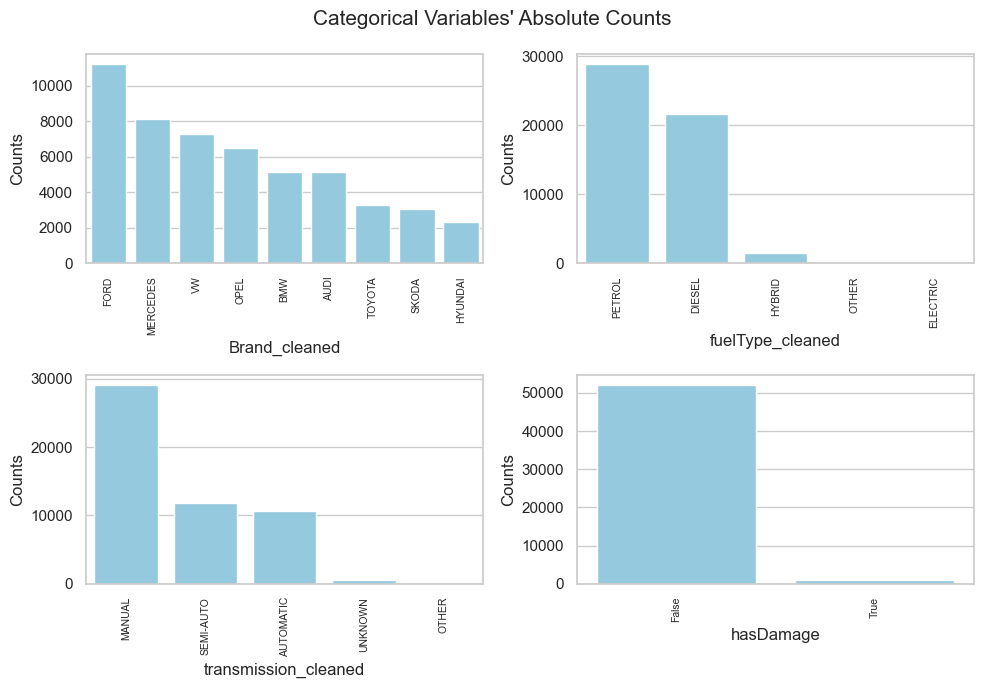

In [289]:
clean_categorical = ['Brand_cleaned', 'fuelType_cleaned', 'transmission_cleaned', 'hasDamage'] # not plotting models as there is a large amount


fig, axes = plt.subplots(
    2, 
    ceil(len(clean_categorical) / 2), 
    figsize=(10, 7)
    )

for ax, feat in zip(axes.flatten(), clean_categorical):
    sns.countplot(x=X_train[feat], ax=ax, 
                  order=X_train[feat].value_counts().index, color = 'skyblue') 
    ax.tick_params(axis='x', rotation=90, labelsize='7.5')  
    ax.set_ylabel('Counts')  


plt.suptitle("Categorical Variables' Absolute Counts", fontsize=15)

plt.tight_layout()
plt.show()

We can now clearly see the distributions across categories:
- most frequent brands are Ford and Mercedes;
- most cars run on petrol and diesel;
- most cars are manual;
- only a very small quantity of cars is damaged.


- Multi-variate bar plots

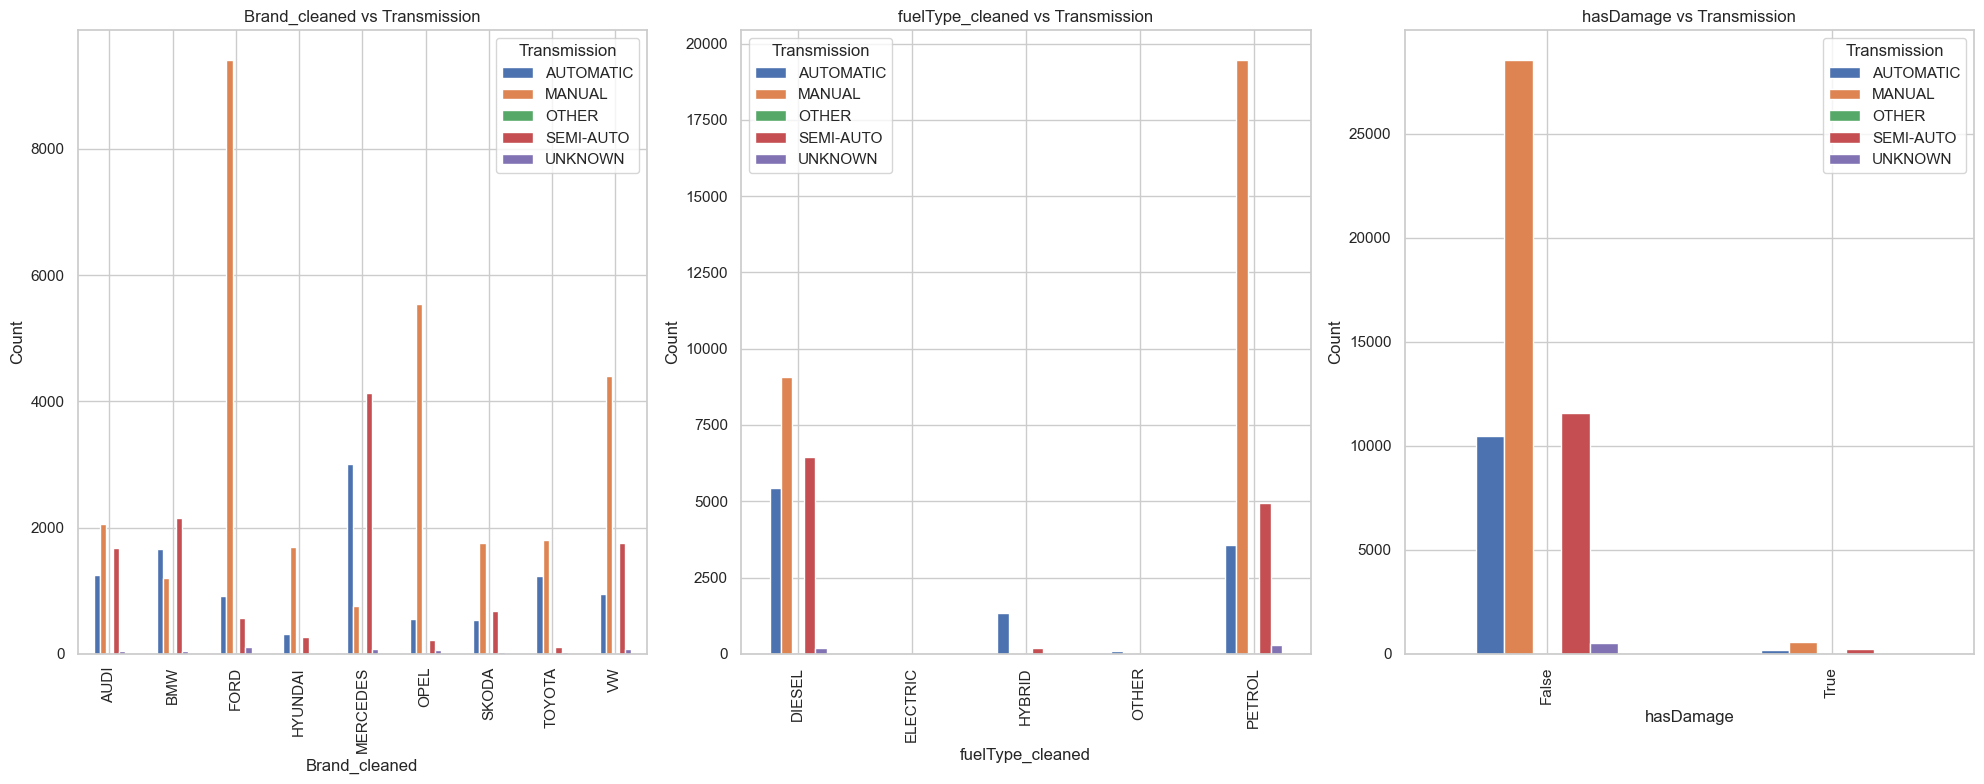

In [290]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))


plot_feats = [x for x in clean_categorical if x not in ['transmission_cleaned']]

for i, var in enumerate(plot_feats):
    
    ct = pd.crosstab(X_train[var], X_train['transmission_cleaned'])
    
    ct.plot(kind='bar', ax=axes[i])
    
    axes[i].set_title(f"{var} vs Transmission")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='Transmission')

plt.tight_layout()
plt.show()

From the plots above, we can see the distribution of brands, fuel types and damage across transmission types. From them we can extract the mode of each category. For example, Ford cars are mostly manual while Mercedes cars are mostly semi-automatic. Most cars run on petrol and diesel and most of those are manual, while hybrid cars are mostly automatic.

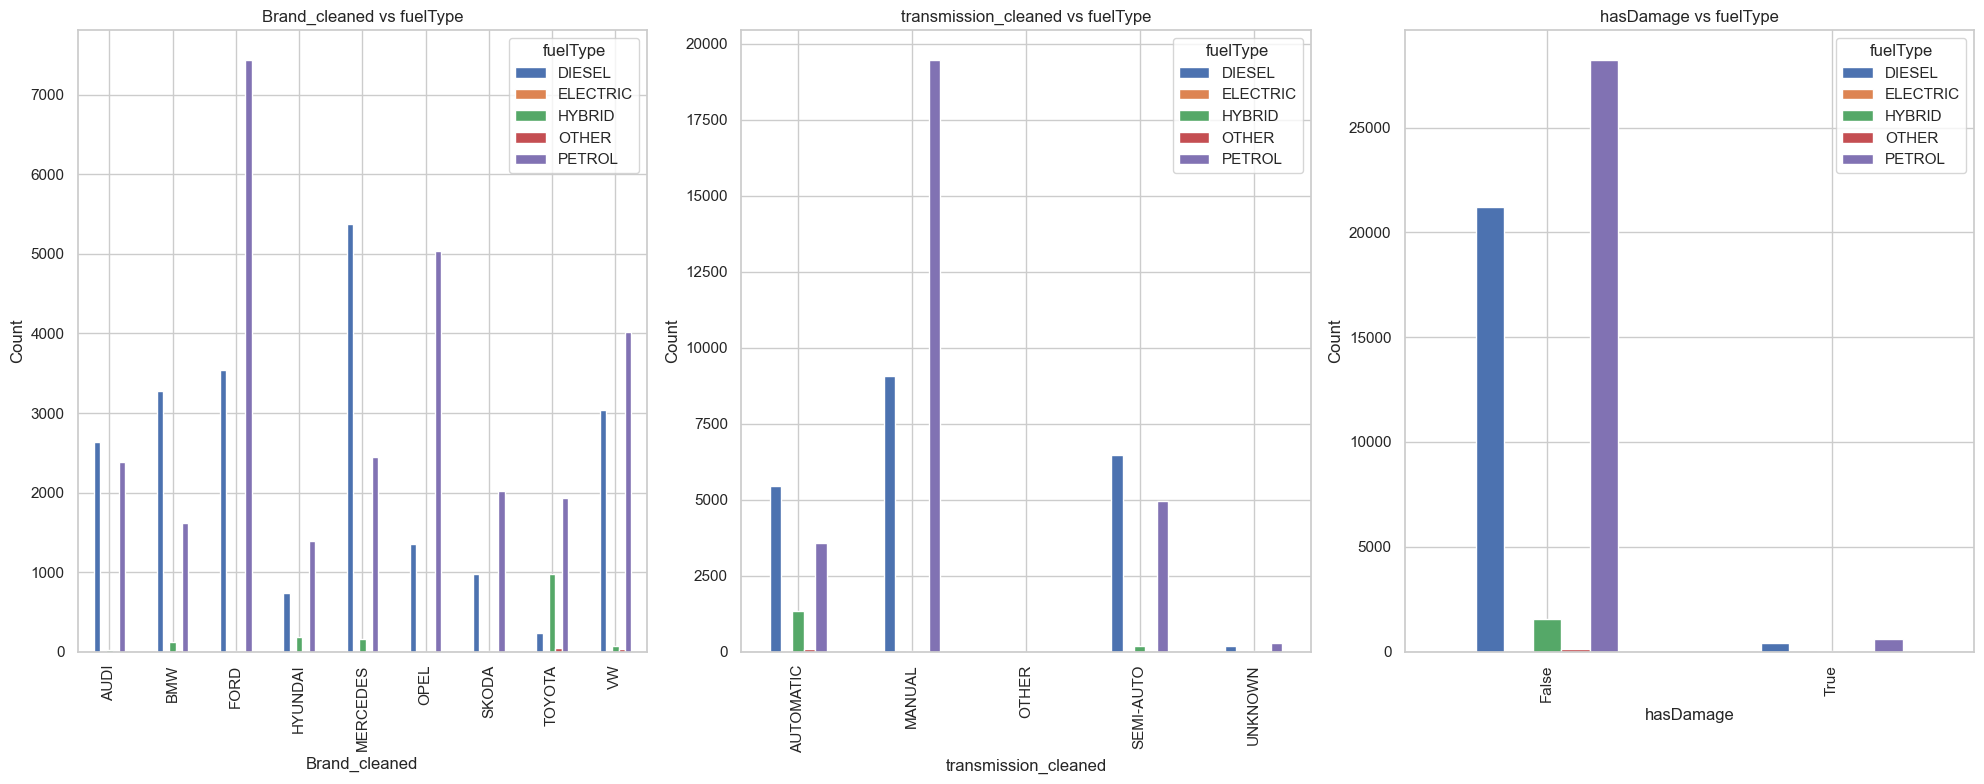

In [291]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))


plot_feats = [x for x in clean_categorical if x not in ['fuelType_cleaned']]

for i, var in enumerate(plot_feats):
    
    ct = pd.crosstab(X_train[var], X_train['fuelType_cleaned'])
    
    ct.plot(kind='bar', ax=axes[i])
    
    axes[i].set_title(f"{var} vs fuelType")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')
    axes[i].legend(title='fuelType')

plt.tight_layout()
plt.show()

In the plots above we can extract similar information. Cars across brands run mostly on petrol and diesel, eg. Ford and Opel cars run mostly on petrol while Mercedes and BMW cars run mostly on diesel. Toyota has the biggest ammount of hybrid cars.

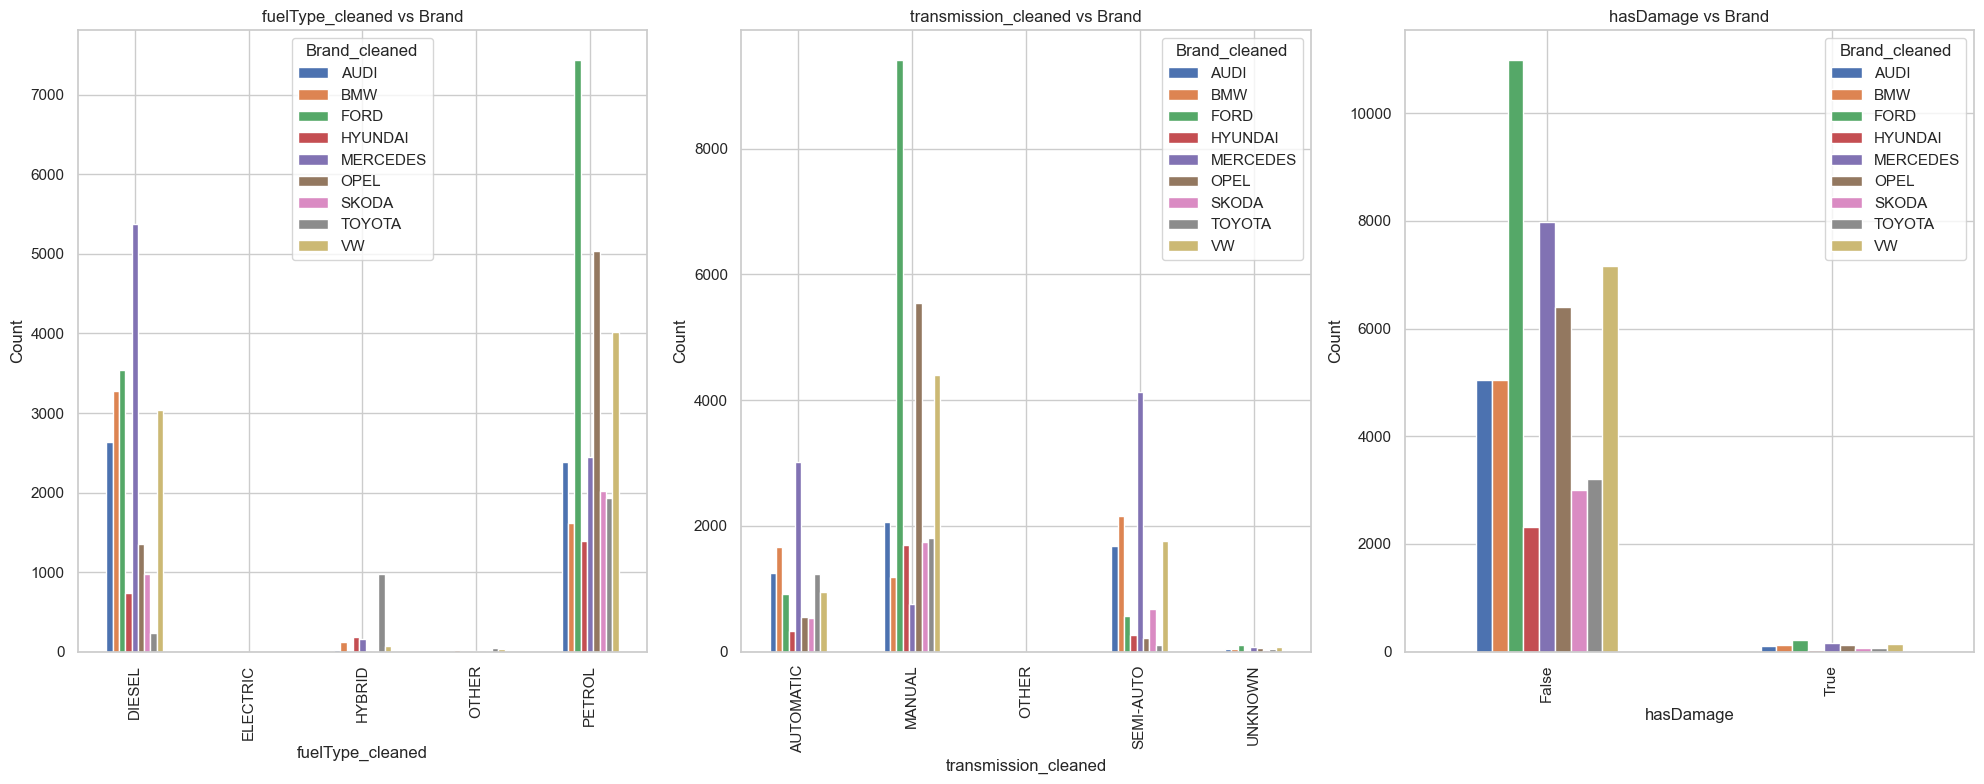

In [292]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# choose categorical features except model & fuelType (you can adjust as needed)
plot_feats = [x for x in clean_categorical if x not in ['Brand_cleaned']]

for i, var in enumerate(plot_feats):
    # cross-tabulate the counts of each category vs transmission type
    ct = pd.crosstab(X_train[var], X_train['Brand_cleaned'])
    
    # plot as grouped bar chart
    ct.plot(kind='bar', ax=axes[i])
    
    axes[i].set_title(f"{var} vs Brand")
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')


plt.tight_layout()
plt.show()

In these plots, we can see the mode for each category across all identified brands:
- most diesel cars are Mercedes and most petrol cars are Ford;
- most manual cars are Ford, automatic and semi-automatic cars are Mercedes;

Performing the Chi-Square test again, we obtain the following results:

In [293]:
clean_categorical.append('model_cleaned')

In [294]:
association_results = pd.DataFrame(columns=clean_categorical, index=clean_categorical)

for var1 in clean_categorical:
    for var2 in clean_categorical:
        #Chi-square test between {var1} and {var2}

        contingency_table = pd.crosstab(X_train[var1], X_train[var2]) # Create the contingency table
        result = chi2_contingency(contingency_table) # Perform the Chi-square test
                                                    #Chi-square Statistic: result[0]
                                                    #p-value: result[1]
                                                    #Degrees of Freedom: result[2]
                                                    #Expected Frequencies: result[3]
        association_results.loc[var1, var2] = result[1]

association_results= association_results.style.map(color_pvalues)
print('P-values:')
display(association_results)

P-values:


,Brand_cleaned,fuelType_cleaned,transmission_cleaned,hasDamage,model_cleaned
Brand_cleaned,0.000000,0.000000,0.000000,0.765990,0.000000
fuelType_cleaned,0.000000,0.000000,0.000000,0.152904,0.000000
transmission_cleaned,0.000000,0.000000,0.000000,0.374794,0.000000
hasDamage,0.765990,0.152904,0.374794,0.000000,0.034370
model_cleaned,0.000000,0.000000,0.000000,0.034370,0.000000


There is statistical evidence of an association between all variables apart from 'hasDamage'

In [295]:
cramer_v_table = pd.DataFrame(columns=clean_categorical, index = clean_categorical)

for var1 in cramer_v_table.columns:
    for var2 in cramer_v_table.index:

        contingency_table = pd.crosstab(X_train[var1], X_train[var2])
        result = chi2_contingency(contingency_table)        

        # Calculate Cramer's V
        X2 = result[0]
        n = df_train.shape[0]
        minimum_dimension = min(X_train[var1].nunique(), X_train[var2].nunique())-1
        cramer_v_table.loc[var1, var2] = np.sqrt((X2/n) / minimum_dimension)

cramer_v_table= cramer_v_table.style.map(color_cramervalues)
print('Cramers V:')
display(cramer_v_table)

Cramers V:


,Brand_cleaned,fuelType_cleaned,transmission_cleaned,hasDamage,model_cleaned
Brand_cleaned,0.828621,0.228101,0.244192,0.008048,0.819116
fuelType_cleaned,0.228101,0.828271,0.164080,0.009387,0.405287
transmission_cleaned,0.244192,0.164080,0.828168,0.007469,0.299962
hasDamage,0.008048,0.009387,0.007469,0.836255,0.053997
model_cleaned,0.819116,0.405287,0.299962,0.053997,0.827150


Brand_cleaned and model_cleaned: the value has increased, which was expected. Each brand has specific models, so it's natural that the association is very high.

Brand_cleaned and fuelType_cleaned / transmission_cleaned: some transmission or fuel patterns are more common in certain brands, but they are not deterministic. The values make sense.

hasDamage with any variable: whether or not a car has damage does not depend on the brand, model, or transmission.

model_cleaned and fuelType_cleaned / transmission_cleaned: different models may have specific fuel or transmission types, so there is some association, but not perfect.

The values in the diagonal are not 1 most likely due to the presence of outliers

In [296]:
no_na_X_train = X_train.dropna(subset=['Brand_cleaned', 'model_cleaned'])

fig = px.treemap(
    no_na_X_train,
    path=['Brand_cleaned', 'model_cleaned'],
)

fig.show()


With this plot we can see the most popular models for each brand. Ford: Focus and Fiesta; Mercedes: C Class and A Class; VW: Golf and Polo; Opel: Corsa and Astra; BMW: 3 Series and 1 Series; Audi : A3 and Q3; Toyota: Yaris and Aygo; Skoda: Fabia and Octavia; Hyundai: Tucson and I30.

In [297]:
no_na_X_train.groupby('model_cleaned')['Brand_cleaned'].nunique().sort_values(ascending=False)

model_cleaned
I3               2
1 SERIES         1
200              1
3 SERIES         1
4 SERIES         1
                ..
YETI OUTDOOR     1
Z3               1
Z4               1
ZAFIRA           1
ZAFIRA TOURER    1
Name: Brand_cleaned, Length: 186, dtype: int64

All models apart from I3 are assigned to only one brand. 

In [298]:
no_na_X_train[(no_na_X_train['model_cleaned'] == 'I3')]

,Brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,previousOwners,hasDamage,Brand_cleaned,transmission_cleaned,fuelType_cleaned,model_cleaned
carID,,,,,,,,,,,,,,,
8497,BMW,I3,2017.0,AUTOMATIC,24041.0,HYBRID,0.0,92.83,NaN,3.0,False,BMW,AUTOMATIC,HYBRID,I3
13378,BMW,I3,2015.0,AUTOMATIC,9886.0,HYBRID,0.0,92.83,NaN,0.0,False,BMW,AUTOMATIC,HYBRID,I3
33505,HYUNDAI,I3,2018.0,MANUAL,8337.0,DIESEL,NaN,74.30,1.6,0.0,False,HYUNDAI,MANUAL,DIESEL,I3
12640,BMW,I3,2017.0,AUTOMATIC,23956.0,OTHER,135.0,92.83,NaN,1.0,False,BMW,AUTOMATIC,OTHER,I3
10967,BMW,I3,2016.0,AUTOMATIC,41063.0,OTHER,0.0,92.83,NaN,6.0,False,BMW,AUTOMATIC,OTHER,I3
12853,BMW,I3,2017.0,AUTOMATIC,10839.0,HYBRID,0.0,92.83,NaN,4.0,False,BMW,AUTOMATIC,HYBRID,I3
10327,BMW,I3,2014.0,AUTOMATIC,42479.0,YBRID,0.0,92.83,NaN,2.0,False,BMW,AUTOMATIC,HYBRID,I3
11962,BMW,I3,2017.0,AUTOMATIC,21025.0,HYBRID,0.0,92.83,NaN,0.0,False,BMW,AUTOMATIC,HYBRID,I3
33430,HYUNDAI,I3,2018.0,MANUAL,30287.0,ETROL,145.0,56.50,1.0,0.0,False,HYUNDAI,MANUAL,PETROL,I3


It is not simply an error in brand since all BMWs I3 are automatic and hybrid while the HYUNDAI ones are manual. HYUNDAI does not have a model called I3, however it has one called I30 that is also present in the data set.

In [299]:
print(f' Similarity Ratio : {SequenceMatcher(None, 'I3', 'I30').ratio()}')
# SequenceMatcher uses the same ratio as difflib's get_close_matches

 Similarity Ratio : 0.8


The ratio in 0.8 but the threshold we are using is 0.85 so they were recognized as the same model. However, we cannot change the threshold to 0.8 because it will start grouping different models (not typos). We will manually change I3 to I30

In [300]:
X_train.loc[(X_train['model_cleaned']=='I3') & (X_train['Brand_cleaned'] == 'HYUNDAI'), 'model_cleaned'] = 'I30'
X_val.loc[(X_val['model_cleaned']=='I3') & (X_val['Brand_cleaned'] == 'HYUNDAI'), 'model_cleaned'] = 'I30'
df_test.loc[(df_test['model_cleaned']=='I3') & (df_test['Brand_cleaned'] == 'HYUNDAI'), 'model_cleaned'] = 'I30'

In [301]:
no_na_X_train = X_train.dropna(subset=['Brand_cleaned', 'model_cleaned'])
no_na_X_train.groupby('model_cleaned')['Brand_cleaned'].nunique().sort_values(ascending=False)

model_cleaned
1 SERIES         1
2 SERIES         1
200              1
3 SERIES         1
4 SERIES         1
                ..
YETI OUTDOOR     1
Z3               1
Z4               1
ZAFIRA           1
ZAFIRA TOURER    1
Name: Brand_cleaned, Length: 186, dtype: int64

Now, each model corresponds to only one brand. We have a perfet hierichal relationship between them Brand -> model. Each model can have only one brand, but each brand can have mutiple models

### **Numerical Variables**

- Scatter plots



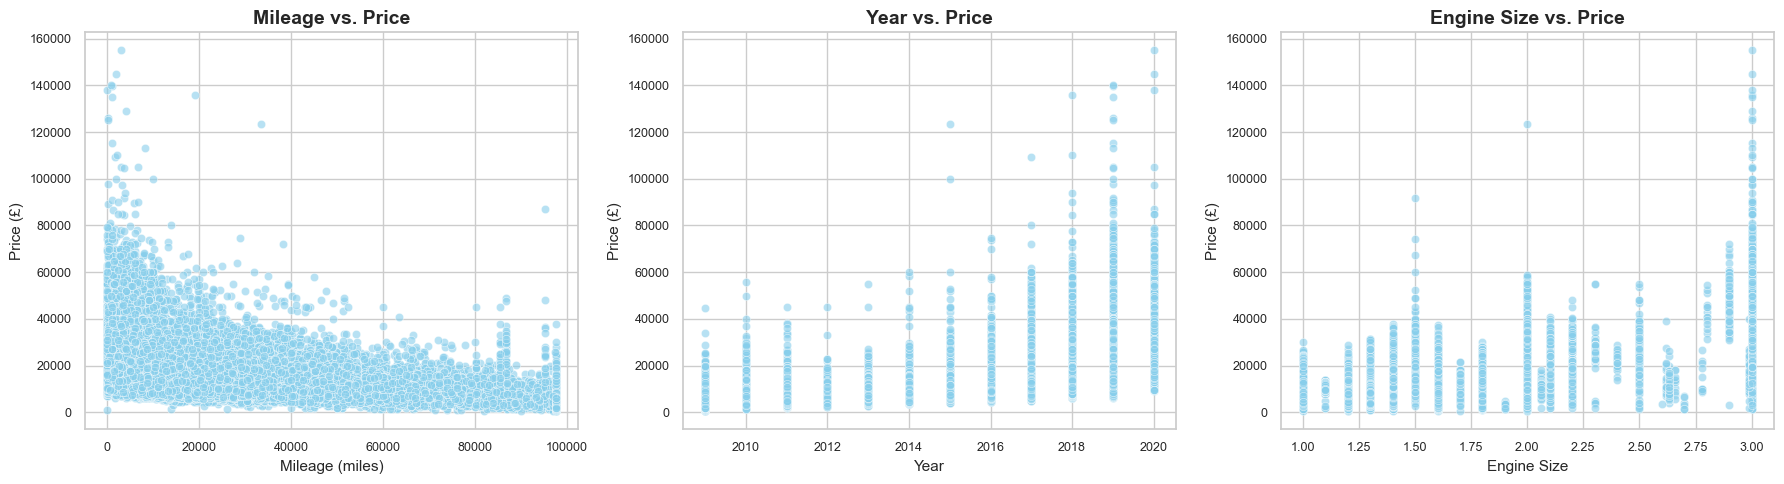

In [302]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

variables = ['mileage', 'year', 'engineSize']
titles = ['Mileage vs. Price', 'Year vs. Price', 'Engine Size vs. Price']
xlabels = ['Mileage (miles)', 'Year', 'Engine Size']

for i, (var, title, xlabels) in enumerate(zip(variables, titles, xlabels)):
    sns.scatterplot( data=X_train, x=var, y=y_train, ax=axes[i], alpha=0.6, color='skyblue' )
    
    axes[i].set_title(title, fontsize=14, fontweight='bold')
    axes[i].set_xlabel(xlabels, fontsize=11)
    axes[i].set_ylabel('Price (£)', fontsize=11)
    axes[i].tick_params(axis='both', labelsize=9)

plt.tight_layout()
plt.show()

Now, the scatter plots are not as noisy and the tendency between mileage, year, engine size and the target variable (price) is clearer. Price decreases with mileage but increases with year. Higher values in price are also associated with higher values in engine size.

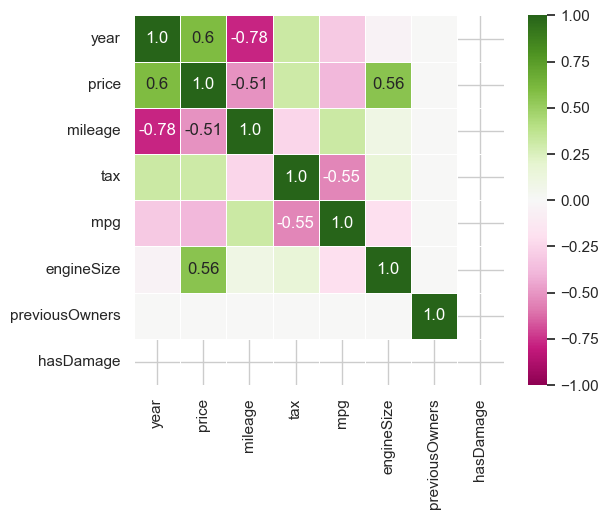

In [303]:

mask_annot = np.absolute(corr.values) >= 0.5 
annot = np.where(mask_annot, 
                 np.round(corr.values, 2),  
                 np.full(corr.shape, ""))


sns.heatmap(data=corr, 
            annot=annot,
            fmt='', 
            vmin=-1, vmax=1, 
            center=0,
            square=True,
            linewidths=.5,
            cmap='PiYG'
            )

plt.show()




From the Spearman correlation heatmap (after outlier treatment):
- there is a strong correlation between mileage and year in opposite directions;
- price and year show a medium-high correlation;
- price and mileage show a medium correlation in opposite directions;
- engine size and price also show mediumm correlation;
- tax and mpg show an opposite medium correlation.

<h3 style="background-color: #bdfeb6ff; color: #449e54ff; padding: 5px; margin: 5px;">
  <strong> Missing Values Treatment </strong>
</h3>

Overall, we are going to impute the missing values in our data set based on either the mode or the median (depending on numerical or categorical variables) of the features that associate the most with the missing variable. We already know that all the variables, now apart from 'hasDamage' have missing values. We will use the results from the visualizations and analysis of the relationships between variables to decide the method of imputation for each feature.

#### **Brand**

For missing 'Brand', we make the association with the model since each model corresponds to only one brand if we have a model without brand (NA), we can simply search in the rest of the data (X_train) for the same model and return the corresponding model. If the model is not present in the train dataset or if its only associated with missing values, then we return the global mode for brand.

In [304]:
brand_mode = X_train['Brand_cleaned'].mode().iloc[0]

# create a mapping from model to most frequent brand
model_to_brand = (
    X_train.dropna(subset=['Brand_cleaned', 'model_cleaned'])
      .groupby('model_cleaned')['Brand_cleaned']
      .agg(lambda x: x.mode().iloc[0])  # get most frequent brand for each model
      .to_dict()
)

X_train['Brand_cleaned'] = X_train.apply(lambda row: impute_brand(row, model_to_brand, brand_mode), axis=1)
X_val['Brand_cleaned'] = X_val.apply(lambda row: impute_brand(row, model_to_brand, brand_mode), axis=1)
df_test['Brand_cleaned'] = df_test.apply(lambda row: impute_brand(row, model_to_brand, brand_mode), axis=1)

In [305]:
print("Train missing Brand after imputation:", X_train['Brand_cleaned'].isna().sum())
print("Validation missing Brand after imputation:", X_val['Brand_cleaned'].isna().sum())
print("Test missing Brand after imputation:", df_test['Brand_cleaned'].isna().sum())

Train missing Brand after imputation: 0
Validation missing Brand after imputation: 0
Test missing Brand after imputation: 0


#### **model**

For missing 'model', we use the specifications that vary the least between models, in descending order of importance. For that 6 mappings are created, the first with all variable that consist of characteristics of the model that are immutable : 'Brand', 'fuelType', 'engineSize', 'transmission'. The last resort consists of using only 'brand' and since that variable is already free on missing values, we will have no issues

In [306]:
maps = build_model_mappings(X_train)
X_train['model_cleaned'] = X_train.apply(lambda row: impute_model_flexible(row, maps), axis=1)
X_val['model_cleaned'] = X_val.apply(lambda row: impute_model_flexible(row, maps), axis=1)
df_test['model_cleaned'] = df_test.apply(lambda row: impute_model_flexible(row, maps), axis=1)

In [307]:
print("Train missing model after imputation:", X_train['model_cleaned'].isna().sum())
print("Validation missing model after imputation:", X_val['model_cleaned'].isna().sum())
print("Test missing model after imputation:", df_test['model_cleaned'].isna().sum())

Train missing model after imputation: 0
Validation missing model after imputation: 0
Test missing model after imputation: 0


#### **year**

We have seen that year and mileage have a very strong correlation so we will use mileage to impute missing values.  We are going to create bins of 'very low', 'low', 'average', 'high' and 'very high' mileage, and impute the median of each bin. To account for observations where both 'year' and 'mileage' are missing, we are going to impute the year based on the most correlated features (first tax, then mpg). If they are also missing, we will impute the median of 'year'.

In [308]:
# Create bins based on mileage quantiles
bins = X_train['mileage'].quantile([0, 0.2, 0.4, 0.6, 0.8, 1]).values
labels = ['very low', 'low', 'average', 'high', 'very high']

X_train['mileage_bin'] = pd.cut(X_train['mileage'], bins=bins, labels=labels, include_lowest=True)
X_val['mileage_bin'] = pd.cut(X_val['mileage'], bins=bins, labels=labels, include_lowest=True)
df_test['mileage_bin'] = pd.cut(df_test['mileage'], bins=bins, labels=labels, include_lowest=True)

In [309]:
year_median = X_train['year'].median()

maps = build_year_mappings(X_train)
X_train['year'] = X_train.apply(lambda row: impute_year(row, maps, year_median), axis=1)
X_val['year'] = X_val.apply(lambda row: impute_year(row, maps, year_median), axis=1)
df_test['year'] = df_test.apply(lambda row: impute_year(row, maps, year_median), axis=1)

In [310]:
print("Train missing year after imputation:", X_train['year'].isna().sum())
print("Validation missing year after imputation:", X_val['year'].isna().sum())
print("Test missing year after imputation:", df_test['year'].isna().sum())

Train missing year after imputation: 0
Validation missing year after imputation: 0
Test missing year after imputation: 0


#### **mileage**

Given the high correlation between ‘year’ and ‘mileage’, we are going to group the cars by 'year' and impute the median of each year.

In [311]:
mileage_map = (
    X_train.dropna(subset=['mileage','year'])
      .groupby(['year'])['mileage']
      .median()
      .to_dict()
)

X_train['mileage'] = X_train.apply(lambda row: impute_mileage(row, mileage_map), axis=1)
X_val['mileage'] = X_val.apply(lambda row: impute_mileage(row, mileage_map), axis=1)
df_test['mileage'] = df_test.apply(lambda row: impute_mileage(row, mileage_map), axis=1)

In [312]:
print("Train missing mileage after imputation:", X_train['mileage'].isna().sum())
print("Validation missing mileage after imputation:", X_val['mileage'].isna().sum())
print("Test missing mileage after imputation:", df_test['mileage'].isna().sum())

Train missing mileage after imputation: 0
Validation missing mileage after imputation: 0
Test missing mileage after imputation: 0


#### **tax**

For 'tax', we are going to group the cars by model and year and impute the median, as cars of the same model tend to have similar road tax values and the age of the car might also be a factor. For cars that are the only model in a certain year, we are going to impute the median of the model. If we don't have more observations of the same model we are trying to impute, we are going to use the median of the year.

In [313]:
maps = build_tax_mappings(X_train)
X_train['tax'] = X_train.apply(lambda row: impute_tax(row, maps), axis=1)
X_val['tax'] = X_val.apply(lambda row: impute_tax(row, maps), axis=1)
df_test['tax'] = df_test.apply(lambda row: impute_tax(row, maps), axis=1)

In [314]:
print("Train missing tax after imputation:", X_train['tax'].isna().sum())
print("Validation missing tax after imputation:", X_val['tax'].isna().sum())
print("Test missing tax after imputation:", df_test['tax'].isna().sum())

Train missing tax after imputation: 0
Validation missing tax after imputation: 0
Test missing tax after imputation: 0


#### **fuelType**

Cars of the same model usually have the same fuel type, so we are going to group the cars by model and impute the mode of the fuel type for each model. If there are no other cars of the same model we are trying to impute, we will use the mode of the brand.

In [315]:
maps = build_fuel_mappings(X_train)
X_train['fuelType_cleaned'] = X_train.apply(lambda row: impute_fueltype(row, maps), axis=1)
X_val['fuelType_cleaned'] = X_val.apply(lambda row: impute_fueltype(row, maps), axis=1)
df_test['fuelType_cleaned'] = df_test.apply(lambda row: impute_fueltype(row, maps), axis=1)

In [316]:
print("Train missing fuelType after imputation:", X_train['fuelType_cleaned'].isna().sum())
print("Validation missing fuelType after imputation:", X_val['fuelType_cleaned'].isna().sum())
print("Test missing fuelType after imputation:", df_test['fuelType_cleaned'].isna().sum())

Train missing fuelType after imputation: 0
Validation missing fuelType after imputation: 0
Test missing fuelType after imputation: 0


#### **transmission**

Cars of the same model usually have the same transmission, so we will impute missing values based on the mode of the model. If we don't have data for that car model, we will use the mode of the brand.

In [317]:
maps = build_transmission_mappings(X_train)
X_train['transmission_cleaned'] = X_train.apply(lambda row: impute_transmission(row, maps), axis=1)
X_val['transmission_cleaned'] = X_val.apply(lambda row: impute_transmission(row, maps), axis=1)
df_test['transmission_cleaned'] = df_test.apply(lambda row: impute_transmission(row, maps), axis=1)

In [318]:
print("Train missing transmission after imputation:", X_train['transmission_cleaned'].isna().sum())
print("Validation missing transmission after imputation:", X_val['transmission_cleaned'].isna().sum())
print("Test missing transmission after imputation:", df_test['transmission_cleaned'].isna().sum())

Train missing transmission after imputation: 0
Validation missing transmission after imputation: 0
Test missing transmission after imputation: 0


#### **mpg**

For 'mpg', we are going to group the cars by model and impute the median of each model, as cars of the same model tend to have the same mpg values. If there are no other cars from that model without NaN mpg, we will impute the median of the brand.

In [319]:
maps = build_mpg_mappings(X_train)
X_train['mpg'] = X_train.apply(lambda row: impute_mpg(row, maps), axis=1)
X_val['mpg'] = X_val.apply(lambda row: impute_mpg(row, maps), axis=1)
df_test['mpg'] = df_test.apply(lambda row: impute_mpg(row, maps), axis=1)

In [320]:
print("Train missing mpg after imputation:", X_train['mpg'].isna().sum())
print("Validation missing mpg after imputation:", X_val['mpg'].isna().sum())
print("Test missing mpg after imputation:", df_test['mpg'].isna().sum())

Train missing mpg after imputation: 0
Validation missing mpg after imputation: 0
Test missing mpg after imputation: 0


#### **engineSize**

Cars of the same model usually have the same engine size, so we are going to impute missing values based on the median of the model. If there are no other cars from that model, we will impute the median of the brand.

In [321]:
maps = build_engine_mappings(X_train)
X_train['engineSize'] = X_train.apply(lambda row: impute_engine(row, maps), axis=1)
X_val['engineSize'] = X_val.apply(lambda row: impute_engine(row, maps), axis=1)
df_test['engineSize'] = df_test.apply(lambda row: impute_engine(row, maps), axis=1)

In [322]:
print("Train missing engineSize after imputation:", X_train['engineSize'].isna().sum())
print("Validation missing engineSize after imputation:", X_val['engineSize'].isna().sum())
print("Test missing engineSize after imputation:", df_test['engineSize'].isna().sum())

Train missing engineSize after imputation: 0
Validation missing engineSize after imputation: 0
Test missing engineSize after imputation: 0


#### **previousOwners**

For 'previousOwners', we are going to group the cars by model and year and impute the median, since older cars tend to have more owners and there are certain models more prone to resale, e.g., luxury cars don't usually have many owners. For the cars that are the only model from a certain year, we can't get the median value of 'previousOwners' of other similar cars, therefore we will impute the median value of the year.

In [323]:
maps = build_owners_mappings(X_train)
X_train['previousOwners'] = X_train.apply(lambda row: impute_owners(row, maps), axis=1)
X_val['previousOwners'] = X_val.apply(lambda row: impute_owners(row, maps), axis=1)
df_test['previousOwners'] = df_test.apply(lambda row: impute_owners(row, maps), axis=1)

In [324]:
print("Train missing previousOwners after imputation:", X_train['previousOwners'].isna().sum())
print("Validation missing previousOwners after imputation:", X_val['previousOwners'].isna().sum())
print("Test missing previousOwners after imputation:", df_test['previousOwners'].isna().sum())

Train missing previousOwners after imputation: 0
Validation missing previousOwners after imputation: 0
Test missing previousOwners after imputation: 0


#### **hasDamage**

'hasDamage' no longer has missing values since we replaced all of them with True

In [325]:
print("Train missing hasDamage:", X_train['hasDamage'].isna().sum())
print("Validation missing hasDamage:", X_val['hasDamage'].isna().sum())
print("Test missing hasDamage:", df_test['hasDamage'].isna().sum())

Train missing hasDamage: 0
Validation missing hasDamage: 0
Test missing hasDamage: 0


The correction of the typos in the categorical columns, outlier and missing value treatment were successfully applied and proved to be useful to clean the data and to create more insightful visualizations. 

From this exploratory data analysis and beggining of pre-processing we were to conclude that: 
- The dataset has large amount of typos in all the categorical variables.
- Numerical features show inconsistencies like negative values and year above 2020.
- paintQuality% is present in both datasets which does not makes sense considering the business's needs.
- All variables have missing values.
- All numeric features have outliers.
- Brand and model have a hierichal relationship, Brand -> model.
- price has significant correlation with year, mileage and engineSize, so these should be important for the models.
- year and milegae have a very strong correlation with opposite direction.
- the missing values in 'hasDamage' refer to having damage so they should be replaced by True

We we able to find a good a approach to clean the data. In the next notebook we will recreate these inicial steps of preprocessing and follow them by typecasting, feature engineering, encoding, scaling and feature selection and combine them all inside a pipeline. We will proceed with the modelling and hyperparameter tuning part of the project, where we will select the model and hyperparameters that best fit our problem.  

